In [11]:
import numpy as np
import torch
from torchvision import transforms, datasets
from torch.utils.data import Dataset, DataLoader, random_split
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
from PIL import Image

In [12]:
class customdataset(Dataset):
    def __init__(self, data_path, label_path=None, transform=None):
        self.train_data = np.load(data_path)
        self.train_data = self.train_data.reshape(-1,28,28)
        self.train_label = np.load(label_path)
        self.transform = transform

    def __len__(self):
        return len(self.train_data)

    def __getitem__(self, idx):
        image = self.train_data[idx]
        label = self.train_label[idx] if self.train_label is not None else None
        image = image.astype(np.float32)

        if self.transform:
            image = self.transform(image)

        return image, label

class testdataset(Dataset):
    def __init__(self, data_path, transform=None):
        self.train_data = np.load(data_path)
        self.train_data = self.train_data.reshape(-1,28,28)
        self.transform = transform

    def __len__(self):
        return len(self.train_data)

    def __getitem__(self, idx):
        image = self.train_data[idx]
        image = image.astype(np.float32)

        if self.transform:
            image = self.transform(image)

        return image

In [13]:
custom_transform = transforms.Compose([transforms.ToTensor()
                                      ])

train_dataset = customdataset(data_path='/content/drive/MyDrive/ML/Datasets/x_train.npy',
                          label_path='/content/drive/MyDrive/ML/Datasets/y_train.npy',
                          transform=custom_transform)

test_dataset = testdataset(data_path = '/content/drive/MyDrive/ML/Datasets/x_test.npy',
                             transform=custom_transform)

print(len(test_dataset))

# Define the total size of the dataset
total_size = len(train_dataset)

# Calculate the sizes for training and validation sets
train_size = int(0.8 * total_size)
print(train_size)
val_size = total_size - train_size
print(val_size)

# Use random_split to split the dataset
train_datset, val_dataset = random_split(train_dataset, [train_size, val_size])

train_loader = DataLoader(dataset=train_datset,
                          batch_size=32,
                          shuffle=True,
                          num_workers=0)

val_loader = DataLoader(dataset=val_dataset,
                        batch_size=32,
                        shuffle=False,
                        num_workers=0)

test_loader = DataLoader(dataset=test_dataset,
                        batch_size=32,
                        shuffle=False,
                        num_workers=0)

#print(test_loader.shape)

10000
48000
12000


Feature batch shape: torch.Size([32, 1, 28, 28])


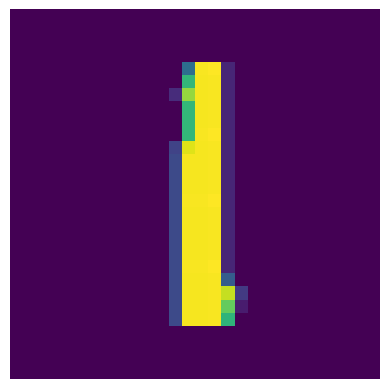

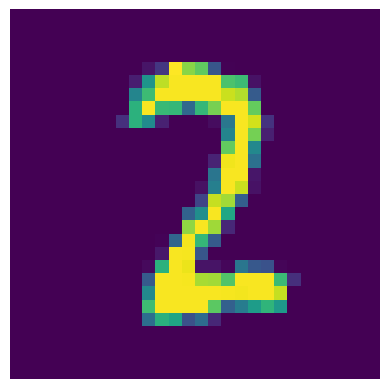

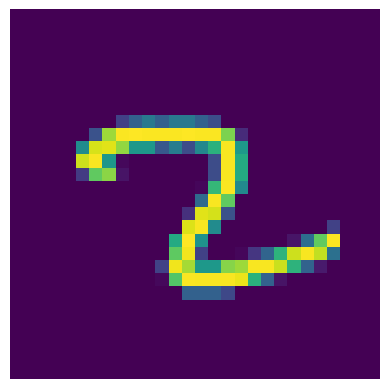

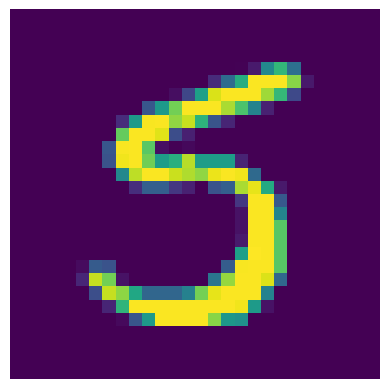

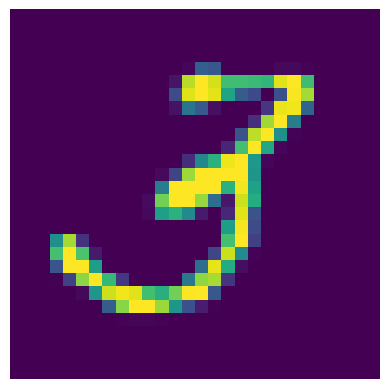

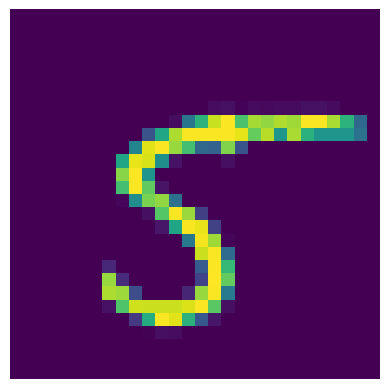

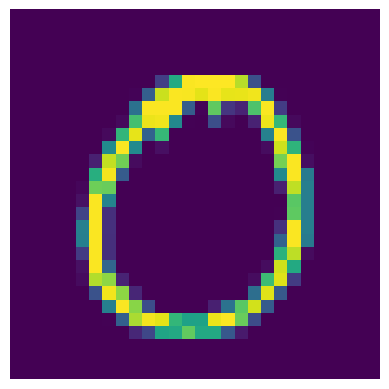

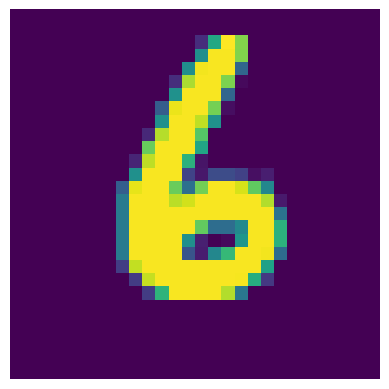

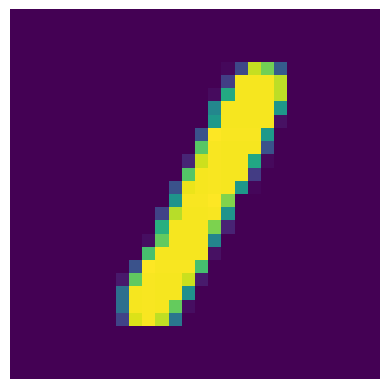

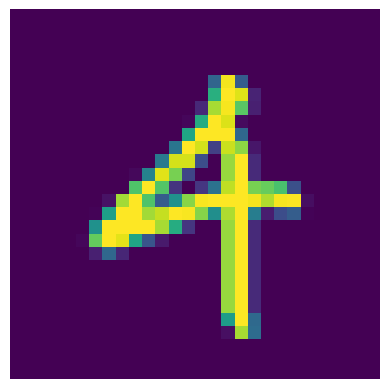

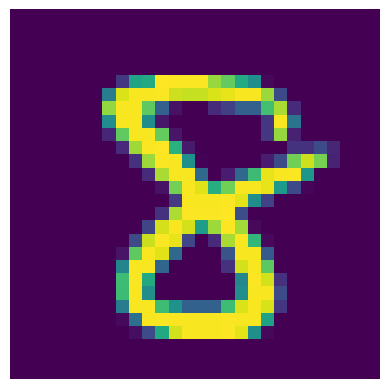

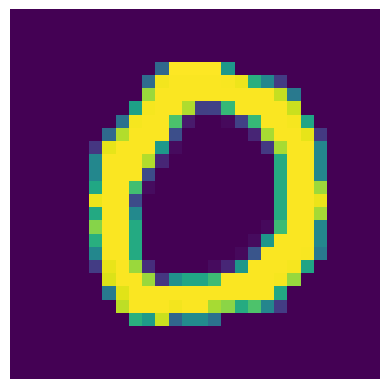

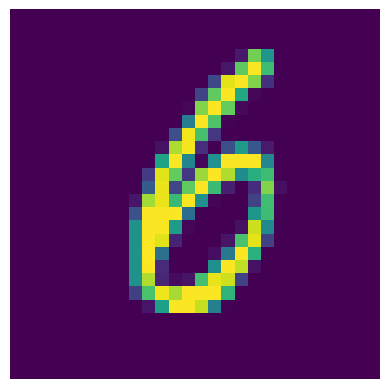

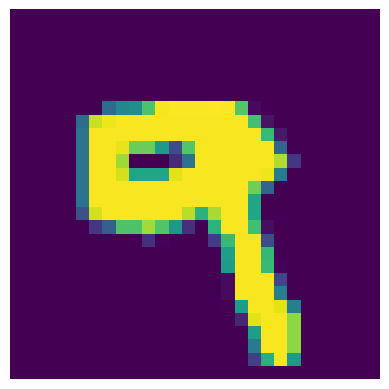

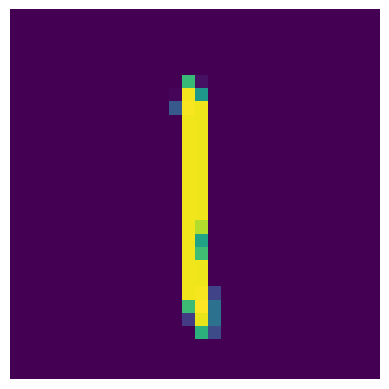

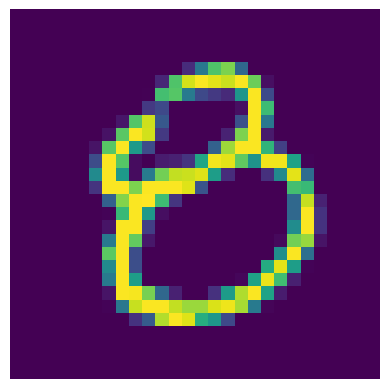

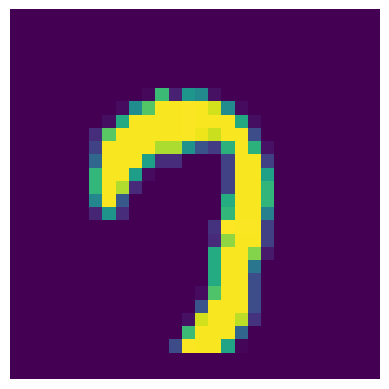

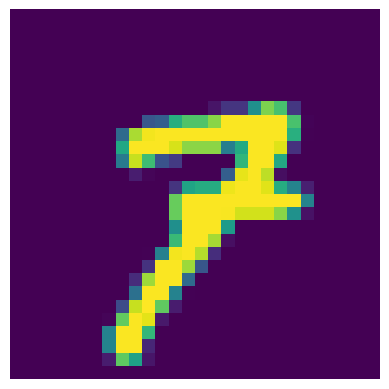

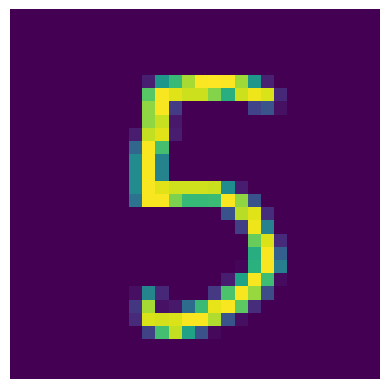

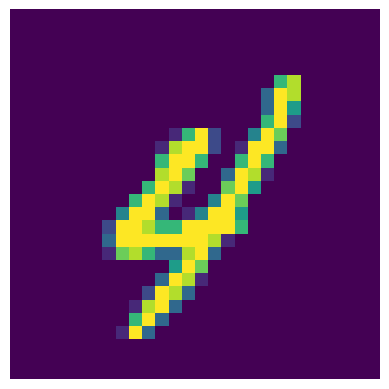

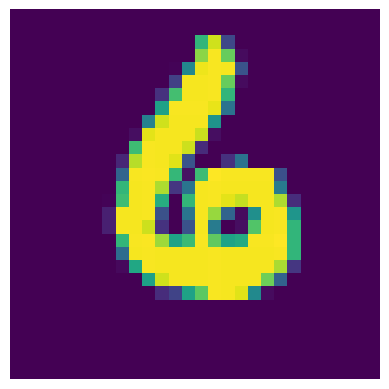

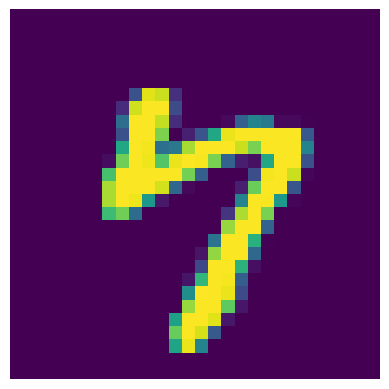

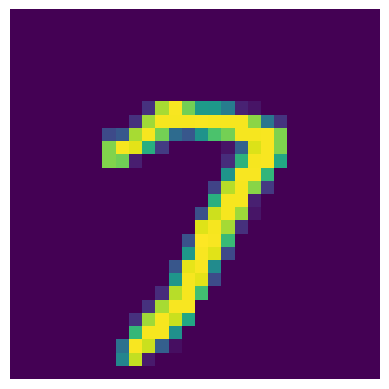

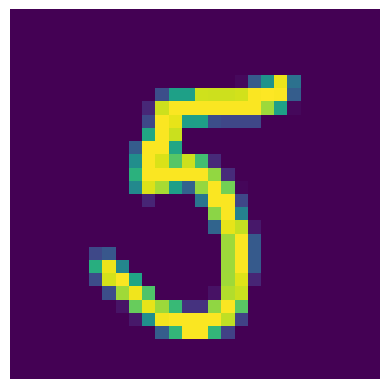

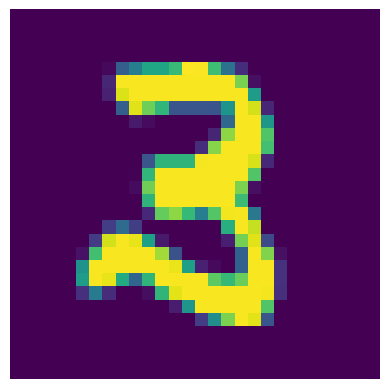

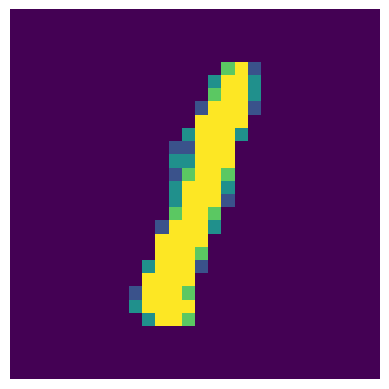

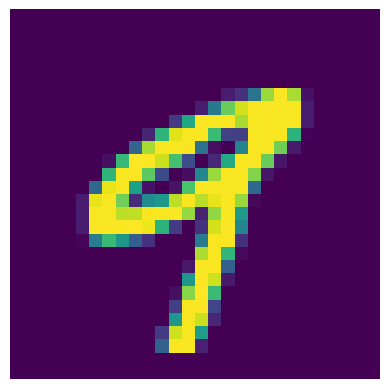

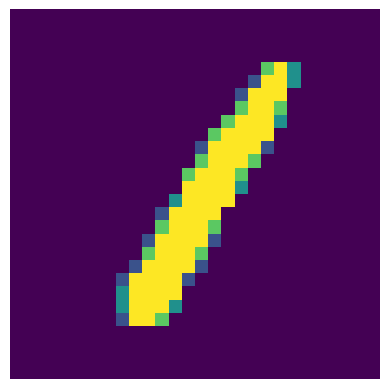

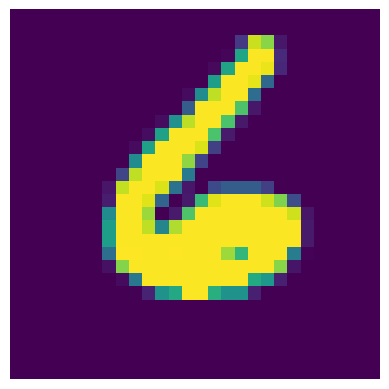

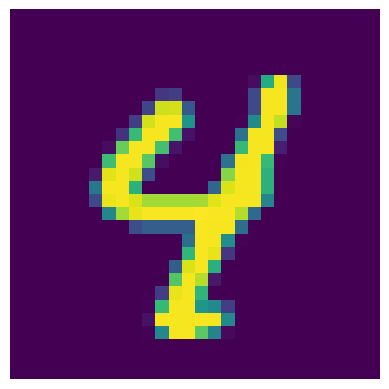

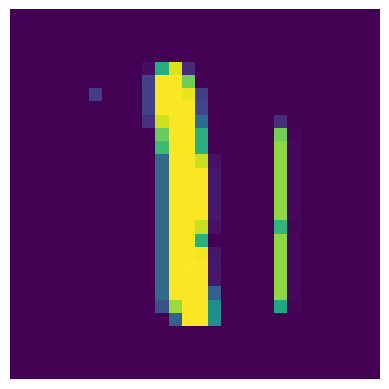

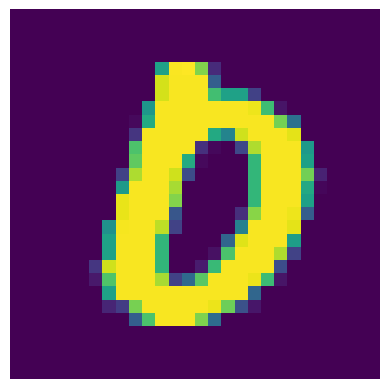

<Figure size 640x480 with 0 Axes>

In [87]:
# Get a batch of data from the data loader

data_iter = iter(test_loader)
images = next(data_iter)

print(f"Feature batch shape: {images.size()}")
#print(f"Labels batch shape: {labels.size()}")

display = True

# # Loop through each image in the batch
# for i in range(len(images)):
#     if display == True:
#         img_array = images[i].mul(255).cpu().numpy()
#         img = Image.fromarray(img_array.squeeze(0))
#         img.show()

for i in range(len(images)):
  if display:
    # Convert image tensor to numpy array
    img_array = images[i].mul(255).cpu().numpy().squeeze(0)
    plt.imshow(img_array)
    plt.axis('off')
    plt.show()
    plt.clf()

Feature batch shape: torch.Size([32, 1, 28, 28])
Labels batch shape: torch.Size([32])


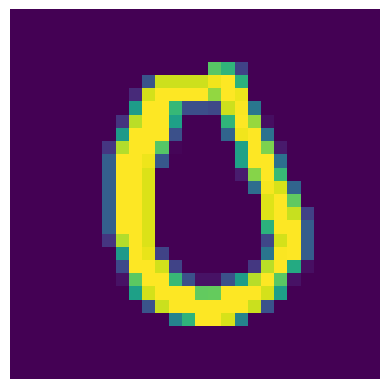

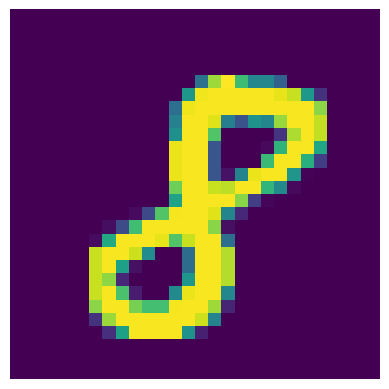

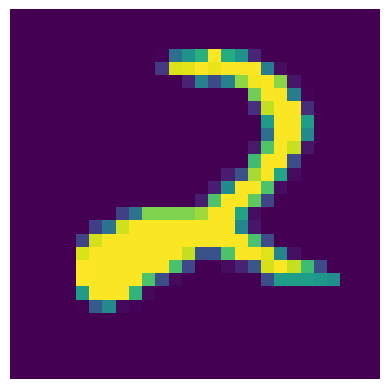

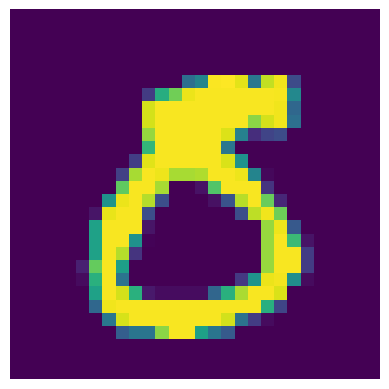

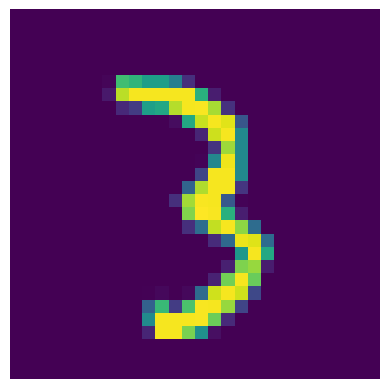

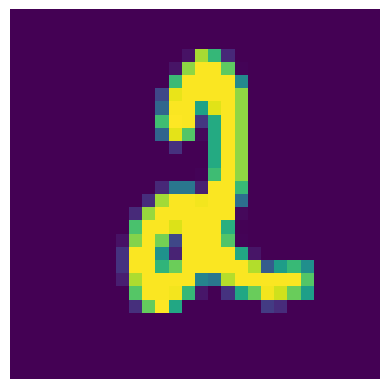

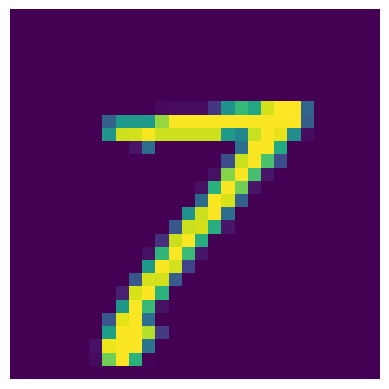

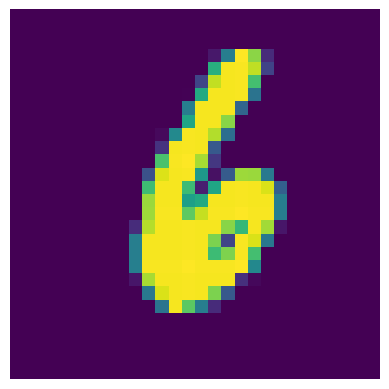

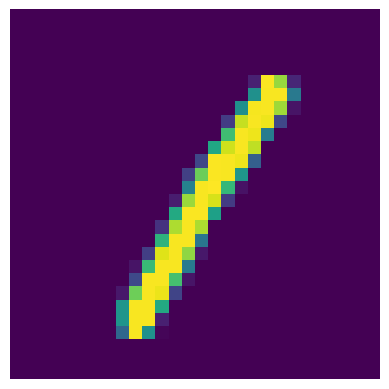

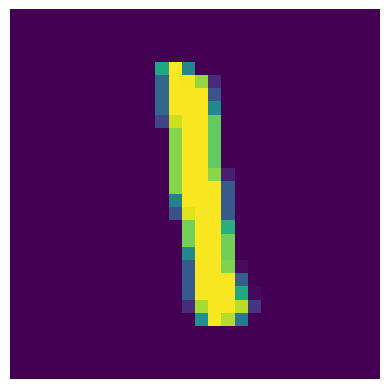

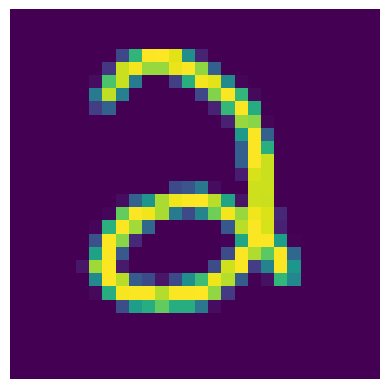

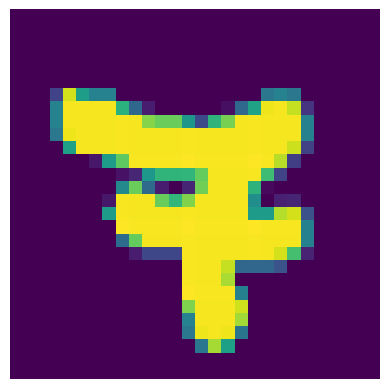

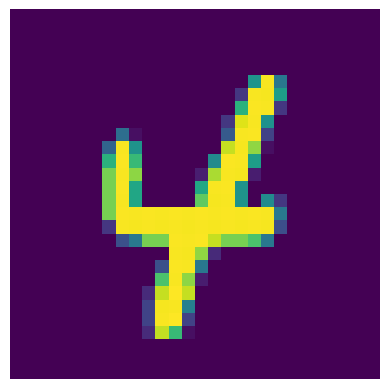

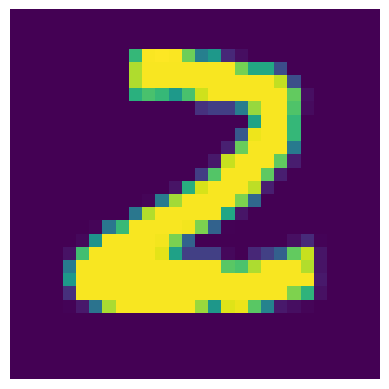

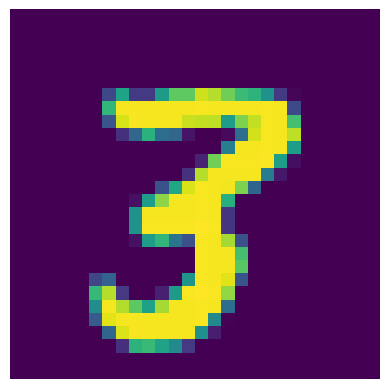

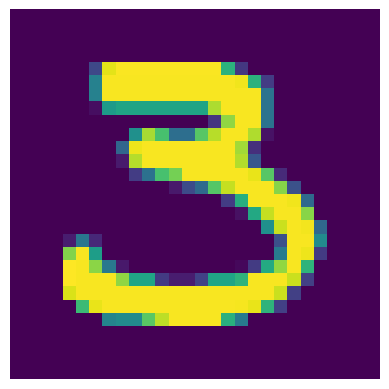

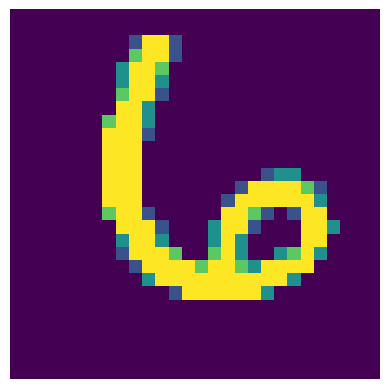

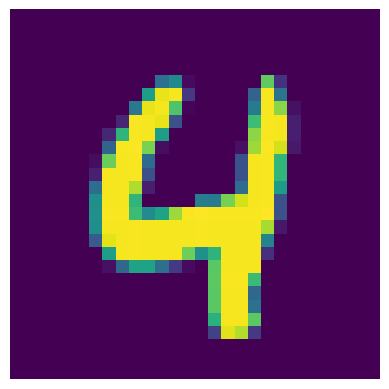

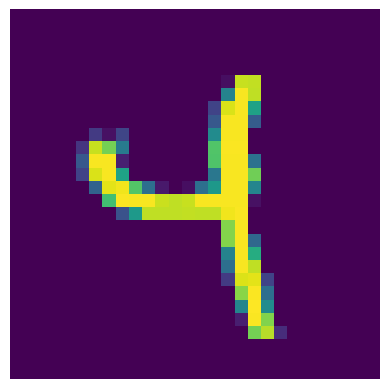

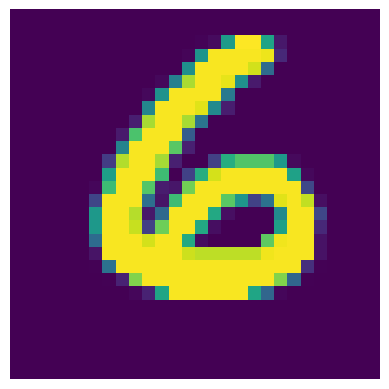

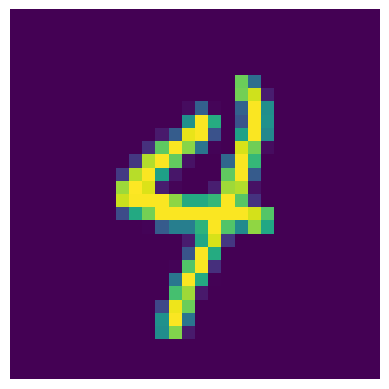

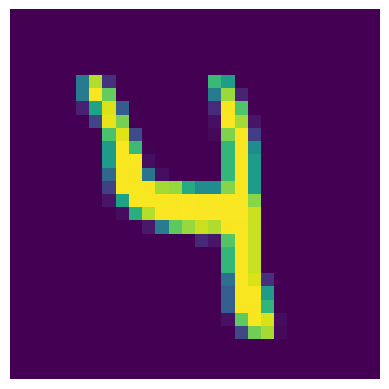

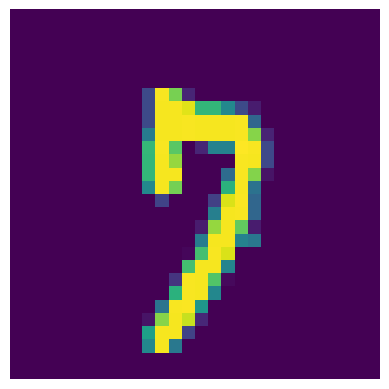

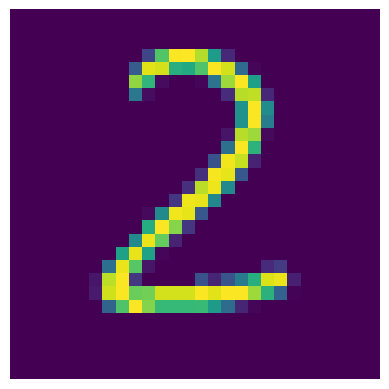

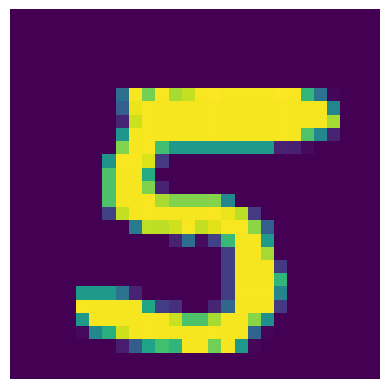

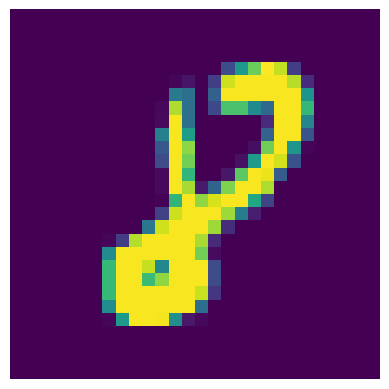

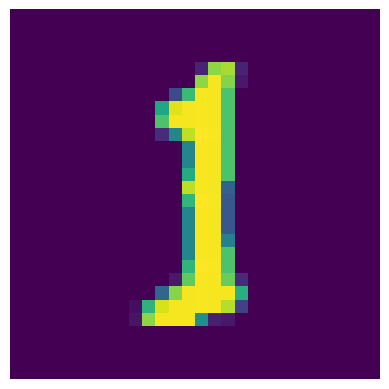

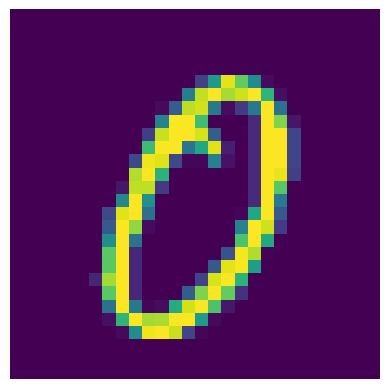

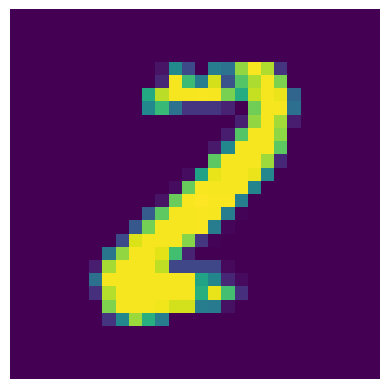

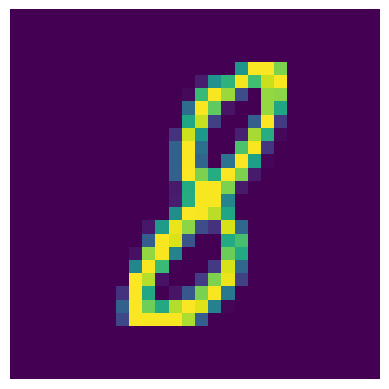

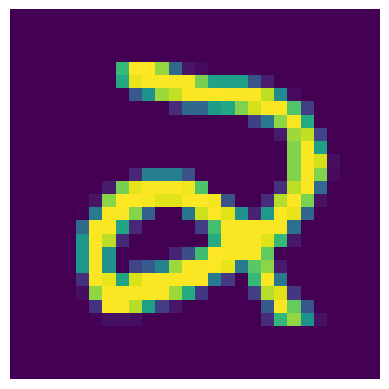

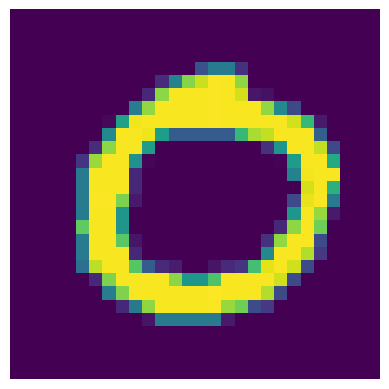

<Figure size 640x480 with 0 Axes>

In [15]:
# Get a batch of data from the data loader

data_iter = iter(train_loader)
images, labels = next(data_iter)

print(f"Feature batch shape: {images.size()}")
print(f"Labels batch shape: {labels.size()}")

display = True

# # Loop through each image in the batch
# for i in range(len(images)):
#     if display == True:
#         img_array = images[i].mul(255).cpu().numpy()
#         img = Image.fromarray(img_array.squeeze(0))
#         img.show()

for i in range(len(images)):
  if display:
    # Convert image tensor to numpy array
    img_array = images[i].mul(255).cpu().numpy().squeeze(0)
    plt.imshow(img_array)
    plt.axis('off')
    plt.show()
    plt.clf()

Digit: 7


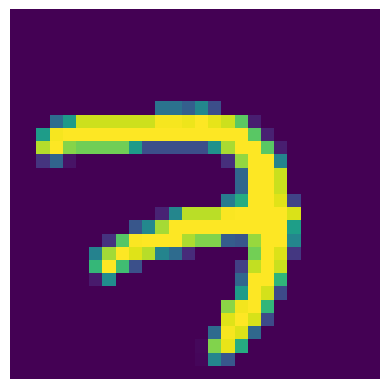

Digit: 3


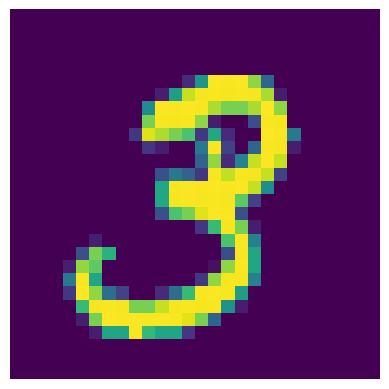

Digit: 4


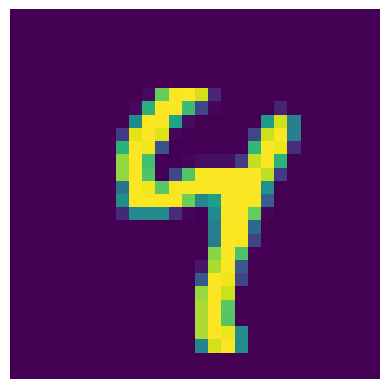

Digit: 6


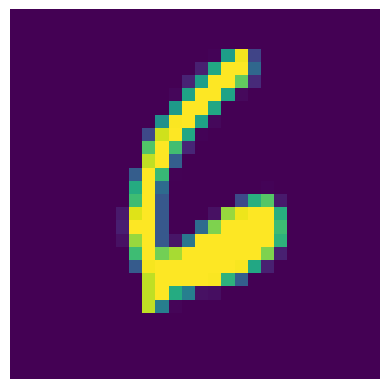

Digit: 1


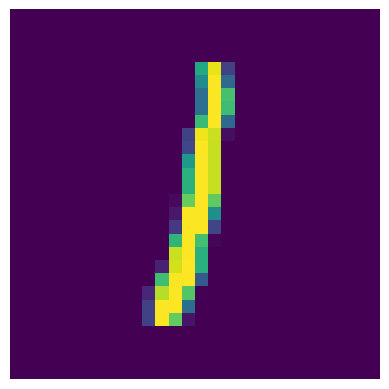

Digit: 8


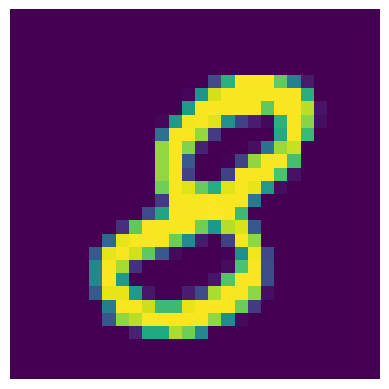

Digit: 0


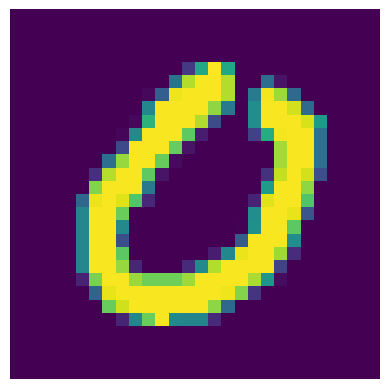

Digit: 9


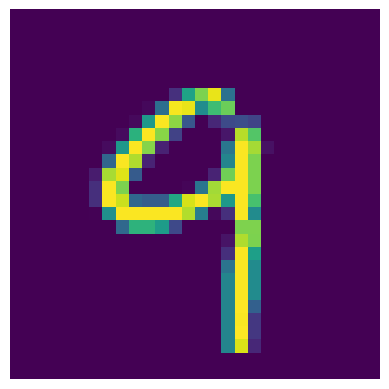

Digit: 2


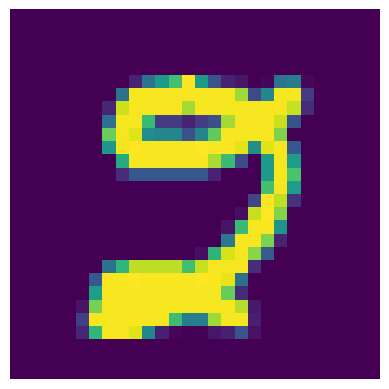

Digit: 5


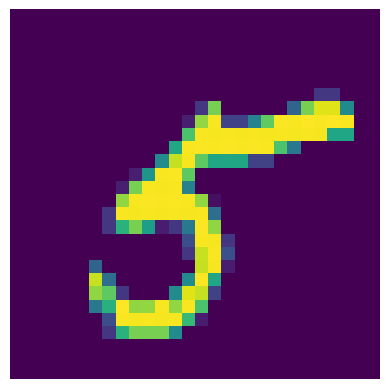

Digit 0: 5923 samples
Digit 1: 6742 samples
Digit 2: 5958 samples
Digit 3: 6131 samples
Digit 4: 5842 samples
Digit 5: 5421 samples
Digit 6: 5918 samples
Digit 7: 6265 samples
Digit 8: 5851 samples
Digit 9: 5949 samples
Total count of all classes (sample size): 60000
Is the data distribution balanced? False


<Figure size 640x480 with 0 Axes>

In [16]:
# Initialize a dictionary to store samples per digit
samples_per_digit = {i: 0 for i in range(10)}

# Initialize a flag to check if one example from each digit has been found
found_examples = {i: False for i in range(10)}

display = True

# Loop through the dataset to find one example from each digit and count samples per digit
for i in range(len(train_dataset)):
    image, label = train_dataset[i]
    if not found_examples[label]:
        found_examples[label] = True
        print(f"Digit: {label}")
        if display == True:
            # img_array = image.mul(255).cpu().numpy()
            # img = Image.fromarray(img_array.squeeze(0))
            # img.show()
            img_array = image.mul(255).cpu().numpy().squeeze(0)
            plt.imshow(img_array)
            plt.axis('off')
            plt.show()
            plt.clf()
    samples_per_digit[label] += 1

counter = 0
# Print the count of samples per digit
for digit, count in samples_per_digit.items():
    count = samples_per_digit[digit]
    print(f"Digit {digit}: {count} samples")
    counter = counter + count
print(f"Total count of all classes (sample size): {counter}")
# Check if the data distribution is balanced
balanced = all(count == samples_per_digit[0] for count in samples_per_digit.values())
print(f"Is the data distribution balanced? {balanced}")

#CNN Model Architecture

In [17]:
import torch.nn as nn
import torch.nn.functional as F

In [18]:
# Define the CNN model
class CNN(nn.Module):
    def __init__(self, num_conv_layers=2, kernel_size=3, dropout_rate=0.5):
        super(CNN, self).__init__()
        self.num_conv_layers = num_conv_layers
        self.kernel_size = kernel_size
        self.dropout_rate = dropout_rate

        self.conv_layers = nn.ModuleList([nn.Conv2d(1, 32, kernel_size, padding=kernel_size // 2)])
        for _ in range(self.num_conv_layers - 1):
            self.conv_layers.append(nn.Conv2d(32, 64, kernel_size, padding=kernel_size // 2))

        # Calculate the input size for the first linear layer
        self.pool = nn.MaxPool2d(2, 2)
        test_tensor = torch.randn(1, 1, 28, 28)
        for conv_layer in self.conv_layers:
            test_tensor = conv_layer(test_tensor)
            test_tensor = self.pool(test_tensor)
        conv_output_size = test_tensor.size(1) * test_tensor.size(2) * test_tensor.size(3)

        self.fc1 = nn.Linear(conv_output_size, 128)
        self.fc2 = nn.Linear(128, 10)
        self.dropout = nn.Dropout(self.dropout_rate)
        self.relu = nn.ReLU()

    def forward(self, x):
        for conv_layer in self.conv_layers:
            x = self.relu(conv_layer(x))
            x = self.pool(x)
        x = torch.flatten(x, 1)
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return F.softmax(x, dim=1)

The above CNN model:

**Convolutional Layers (conv_layers):** The conv_layers attribute is a list of convolutional layers created using nn.Conv2d. Each convolutional layer applies a set of learnable filters to the input image, extracting features relevant to the task.

padding=kernel_size//2, the amount of padding added to each side of the input feature maps is such that the output feature maps have the same spatial dimensions as the input. This preserves spatial information at the edges of the feature maps.                                             

**Pooling Layer (pool):** The pooling layer downsamples the feature maps produced by the convolutional layers. Max pooling, as used here, retains the most important features in each region, reducing the spatial dimensions of the data.

Using Max pooling over average pooling because max pooling preserves the most important features while reducing the spatial dimensions of the feature maps, helping to prevent overfitting.And I'm not using pooling after each layer because pooling after each convolutional layer can lead to a significant reduction in the spatial dimensions of the feature maps, which may cause the network to lose important spatial information.

**Fully Connected Layers (fc1 and fc2):** After the convolutional layers, the feature maps are flattened and passed through fully connected layers. These layers learn to map the extracted features to the final output classes.

**Activation Function (relu):** The ReLU activation function introduces non-linearity to the model, allowing it to learn complex patterns in the data. ReLU is commonly used in convolutional neural networks due to its simplicity and effectiveness.

**Softmax Activation (F.softmax):** The softmax function is applied to the output of the last fully connected layer to convert the raw scores into class probabilities. This allows the model to make predictions based on the class with the highest probability.

In [19]:
cnn = CNN()
print(cnn)

CNN(
  (conv_layers): ModuleList(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  )
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=3136, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
  (relu): ReLU()
)


In [20]:
loss_func = nn.CrossEntropyLoss()
loss_func

CrossEntropyLoss()

In [21]:
from torch import optim

optimizer = optim.Adam(cnn.parameters(), lr=0.001)
optimizer

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    weight_decay: 0
)

Chosen parameters to experiement with:

a) **number of convolution layers** - 1 and 2

More the number of convolution layers, more complex features would be learnt by the model. And greater the generalization wherein it could classify unseen images correctly. But it becomes computionally heavy as the number of convolution layer increases.

b) **kernel/filter size** - 3, 5, 7

Smaller filter size capture very minute and fine deatils of features in the data whereas larger filters capture more complex features in the data.

c) **dropout** - 0.3, 0.5, 0.7

Dropout helps prevent overfitting by removing activation from a certain percent of perceptrons/neurons randomly, so the model must generalize things more and learn the features more robustly. It might also result in underfitting if more activations are removed. And it is computationally heavy as it takes more iterations to converge.

**Number of Layers (num_layers):**

*   1 Layer: A single-layer CNN is relatively simple and may struggle with capturing complex patterns in the data, especially for tasks requiring more sophisticated features.
*   2 Layers: Adding a second layer allows the network to learn more intricate features from the input data. This can lead to better performance, especially for tasks with moderately complex patterns.

**Kernel Size (kernel_size):**

*   3x3 Kernel: Effective at capturing small to medium-sized features in the data. It strikes a balance between capturing fine details and maintaining a relatively low computational cost.
*   5x5 Kernel: Capture larger features in the data but may increase the computational complexity of the network. It can be beneficial for tasks where larger patterns are crucial.
*   7x7 Kernel: Captures very large features in the data. However, it significantly increases the computational cost and may not always lead to better performance, especially if smaller kernels can capture the necessary information.

**Dropout Rate (dropout):**

*   0.3 Dropout: A dropout rate of 0.3 means that 30% of the neurons will be randomly set to zero during training, which can help prevent overfitting without excessively hurting the model's performance.
*   0.5 Dropout: A dropout rate of 0.5 is more aggressive and can help prevent overfitting even further. However, too much dropout can lead to underfitting, so it should be carefully tuned.
*   0.7 Dropout: A dropout rate of 0.7 is very aggressive and may lead to underfitting if not balanced properly. It should be used with caution, especially in conjunction with other regularization techniques.

In [22]:
# Define hyperparameters to experiment with
num_conv_layers_list = [1, 2]
kernel_size_list = [3, 5, 7]
dropout_rate_list = [0.3, 0.5, 0.7]

In [23]:
# # Function to train the model
# def train_model(model, train_loader, criterion, optimizer, num_epochs=5):
#     model.train()
#     for epoch in range(num_epochs):
#         running_loss = 0.0
#         correct = 0
#         total = 0
#         for i, (inputs, labels) in enumerate(train_loader, 1):
#             optimizer.zero_grad()
#             outputs = model(inputs)
#             loss = criterion(outputs, labels)
#             loss.backward()
#             optimizer.step()
#             running_loss += loss.item() * inputs.size(0)
#             _, predicted = torch.max(outputs, 1)
#             total += labels.size(0)
#             correct += (predicted == labels).sum().item()
#             if i % 100 == 0:  # Print info every 100 mini-batches
#                 accuracy = correct / total
#                 print(f"Epoch [{epoch+1}/{num_epochs}], Step [{i}/{len(train_loader)}], Loss: {loss.item():.4f}, Accuracy: {accuracy:.4f}")
#         epoch_loss = running_loss / len(train_loader.dataset)
#         epoch_accuracy = correct / total
#         print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.4f}")

# # Function to evaluate the model on validation data
# def evaluate_model(model, val_loader):
#     model.eval()
#     correct = 0
#     total = 0
#     with torch.no_grad():
#         for inputs, labels in val_loader:
#             outputs = model(inputs)
#             _, predicted = torch.max(outputs, 1)
#             total += labels.size(0)
#             correct += (predicted == labels).sum().item()
#     accuracy = correct / total
#     print(f"Validation Accuracy: {accuracy:.4f}")
#     return accuracy

In [24]:
def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=10):
    train_losses = []
    train_accuracies = []
    val_losses = []
    val_accuracies = []

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0

        for i, (inputs, labels) in enumerate(train_loader, 1):
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        epoch_loss = running_loss / len(train_loader.dataset)
        epoch_accuracy = correct / total
        train_losses.append(epoch_loss)
        train_accuracies.append(epoch_accuracy)

        print(f"Epoch [{epoch+1}/{num_epochs}], Training Loss: {epoch_loss:.4f}, Training Accuracy: {epoch_accuracy:.4f}")

        # Evaluate on validation data
        val_loss, val_accuracy = evaluate_model(model, val_loader, criterion)
        val_losses.append(val_loss)
        val_accuracies.append(val_accuracy)

    # Plotting
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(range(1, num_epochs + 1), train_losses, label='Training Loss')
    plt.plot(range(1, num_epochs + 1), val_losses, label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(range(1, num_epochs + 1), train_accuracies, label='Training Accuracy')
    plt.plot(range(1, num_epochs + 1), val_accuracies, label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

def evaluate_model(model, val_loader, criterion):
    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    val_loss = val_loss / len(val_loader.dataset)
    val_accuracy = correct / total
    print(f"Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}")
    return val_loss, val_accuracy

In [15]:
# # Experiment with hyperparameters
# best_accuracy = 0.0
# best_hyperparameters = None
# for num_conv_layers in num_conv_layers_list:
#     for kernel_size in kernel_size_list:
#         for dropout_rate in dropout_rate_list:
#             print(f"Experimenting with num_conv_layers={num_conv_layers}, kernel_size={kernel_size}, dropout_rate={dropout_rate}")
#             model = CNN(num_conv_layers=num_conv_layers, kernel_size=kernel_size, dropout_rate=dropout_rate)
#             criterion = nn.CrossEntropyLoss()
#             optimizer = optim.Adam(model.parameters(), lr=0.001)
#             #train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
#             #val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
#             train_model(model, train_loader, val_loader, criterion, optimizer)
#             _,accuracy = evaluate_model(model, val_loader, criterion)
#             if accuracy > best_accuracy:
#                 best_accuracy = accuracy
#                 best_hyperparameters = (num_conv_layers, kernel_size, dropout_rate)

# print(f"Best hyperparameters: num_conv_layers={best_hyperparameters[0]}, kernel_size={best_hyperparameters[1]}, dropout_rate={best_hyperparameters[2]}")
# print(f"Final Validation Accuracy: {best_accuracy:.4f}")

Experimenting with num_conv_layers=1, kernel_size=3, dropout_rate=0.3
Epoch [1/10], Training Loss: 1.6019, Training Accuracy: 0.8694
Validation Loss: 1.5124, Validation Accuracy: 0.9535
Epoch [2/10], Training Loss: 1.5113, Training Accuracy: 0.9540
Validation Loss: 1.4930, Validation Accuracy: 0.9703
Epoch [3/10], Training Loss: 1.4972, Training Accuracy: 0.9666
Validation Loss: 1.4877, Validation Accuracy: 0.9751
Epoch [4/10], Training Loss: 1.4912, Training Accuracy: 0.9718
Validation Loss: 1.4833, Validation Accuracy: 0.9788
Epoch [5/10], Training Loss: 1.4865, Training Accuracy: 0.9763
Validation Loss: 1.4827, Validation Accuracy: 0.9797
Epoch [6/10], Training Loss: 1.4839, Training Accuracy: 0.9786
Validation Loss: 1.4802, Validation Accuracy: 0.9810
Epoch [7/10], Training Loss: 1.4820, Training Accuracy: 0.9803
Validation Loss: 1.4795, Validation Accuracy: 0.9824
Epoch [8/10], Training Loss: 1.4806, Training Accuracy: 0.9814
Validation Loss: 1.4820, Validation Accuracy: 0.9796
Ep

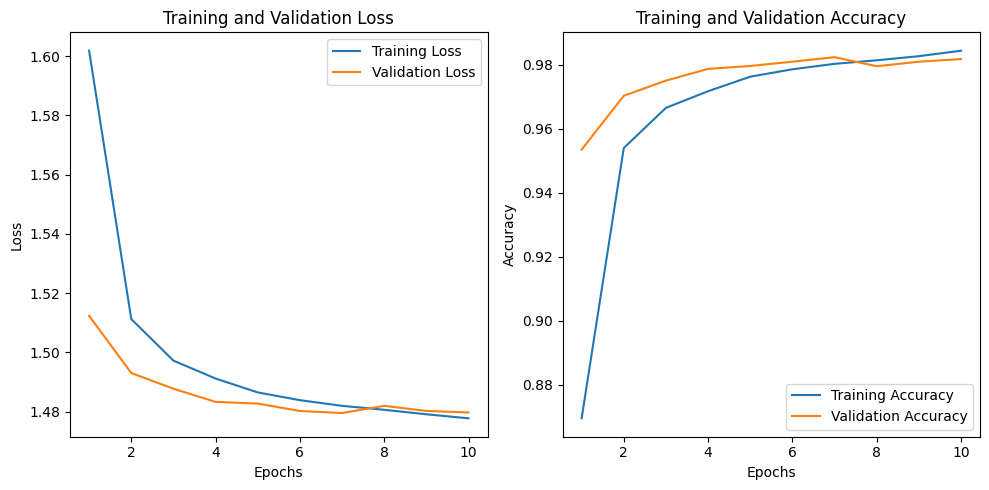

Validation Loss: 1.4797, Validation Accuracy: 0.9818
Experimenting with num_conv_layers=1, kernel_size=3, dropout_rate=0.5
Epoch [1/10], Training Loss: 1.6587, Training Accuracy: 0.8111
Validation Loss: 1.5207, Validation Accuracy: 0.9432
Epoch [2/10], Training Loss: 1.5414, Training Accuracy: 0.9256
Validation Loss: 1.5025, Validation Accuracy: 0.9609
Epoch [3/10], Training Loss: 1.5212, Training Accuracy: 0.9439
Validation Loss: 1.4955, Validation Accuracy: 0.9668
Epoch [4/10], Training Loss: 1.5116, Training Accuracy: 0.9526
Validation Loss: 1.4929, Validation Accuracy: 0.9688
Epoch [5/10], Training Loss: 1.5059, Training Accuracy: 0.9572
Validation Loss: 1.4867, Validation Accuracy: 0.9751
Epoch [6/10], Training Loss: 1.5022, Training Accuracy: 0.9609
Validation Loss: 1.4847, Validation Accuracy: 0.9771
Epoch [7/10], Training Loss: 1.4985, Training Accuracy: 0.9640
Validation Loss: 1.4845, Validation Accuracy: 0.9771
Epoch [8/10], Training Loss: 1.4957, Training Accuracy: 0.9669
Va

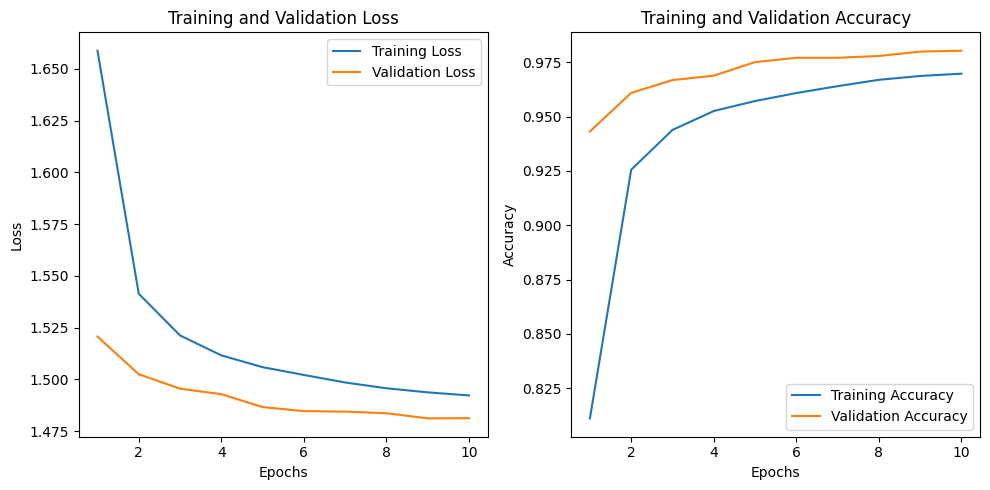

Validation Loss: 1.4813, Validation Accuracy: 0.9803
Experimenting with num_conv_layers=1, kernel_size=3, dropout_rate=0.7
Epoch [1/10], Training Loss: 1.7368, Training Accuracy: 0.7372
Validation Loss: 1.5328, Validation Accuracy: 0.9307
Epoch [2/10], Training Loss: 1.6098, Training Accuracy: 0.8575
Validation Loss: 1.5084, Validation Accuracy: 0.9535
Epoch [3/10], Training Loss: 1.5747, Training Accuracy: 0.8913
Validation Loss: 1.5008, Validation Accuracy: 0.9607
Epoch [4/10], Training Loss: 1.5608, Training Accuracy: 0.9043
Validation Loss: 1.4968, Validation Accuracy: 0.9647
Epoch [5/10], Training Loss: 1.5505, Training Accuracy: 0.9133
Validation Loss: 1.4931, Validation Accuracy: 0.9679
Epoch [6/10], Training Loss: 1.5444, Training Accuracy: 0.9192
Validation Loss: 1.4912, Validation Accuracy: 0.9701
Epoch [7/10], Training Loss: 1.5417, Training Accuracy: 0.9211
Validation Loss: 1.4894, Validation Accuracy: 0.9719
Epoch [8/10], Training Loss: 1.5345, Training Accuracy: 0.9287
Va

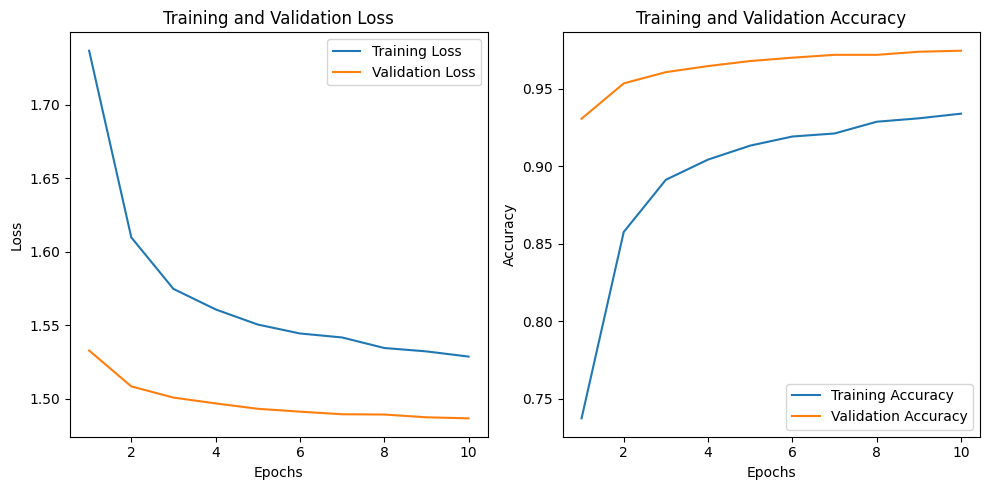

Validation Loss: 1.4866, Validation Accuracy: 0.9746
Experimenting with num_conv_layers=1, kernel_size=5, dropout_rate=0.3
Epoch [1/10], Training Loss: 1.5683, Training Accuracy: 0.9014
Validation Loss: 1.4990, Validation Accuracy: 0.9647
Epoch [2/10], Training Loss: 1.4990, Training Accuracy: 0.9647
Validation Loss: 1.4865, Validation Accuracy: 0.9753
Epoch [3/10], Training Loss: 1.4891, Training Accuracy: 0.9735
Validation Loss: 1.4823, Validation Accuracy: 0.9793
Epoch [4/10], Training Loss: 1.4849, Training Accuracy: 0.9774
Validation Loss: 1.4788, Validation Accuracy: 0.9828
Epoch [5/10], Training Loss: 1.4821, Training Accuracy: 0.9798
Validation Loss: 1.4772, Validation Accuracy: 0.9847
Epoch [6/10], Training Loss: 1.4795, Training Accuracy: 0.9821
Validation Loss: 1.4798, Validation Accuracy: 0.9811
Epoch [7/10], Training Loss: 1.4775, Training Accuracy: 0.9839
Validation Loss: 1.4776, Validation Accuracy: 0.9836
Epoch [8/10], Training Loss: 1.4767, Training Accuracy: 0.9846
Va

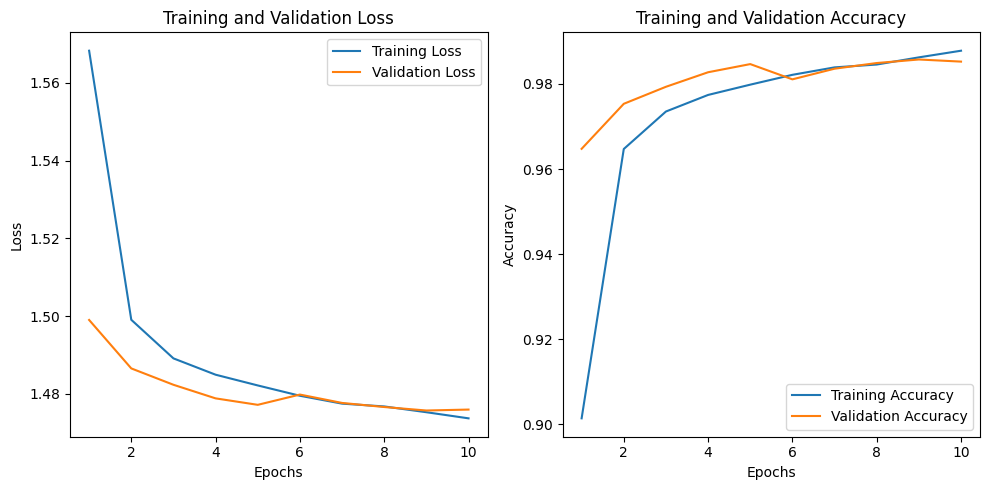

Validation Loss: 1.4759, Validation Accuracy: 0.9852
Experimenting with num_conv_layers=1, kernel_size=5, dropout_rate=0.5
Epoch [1/10], Training Loss: 1.6141, Training Accuracy: 0.8550
Validation Loss: 1.4997, Validation Accuracy: 0.9628
Epoch [2/10], Training Loss: 1.5146, Training Accuracy: 0.9496
Validation Loss: 1.4925, Validation Accuracy: 0.9696
Epoch [3/10], Training Loss: 1.5019, Training Accuracy: 0.9615
Validation Loss: 1.4867, Validation Accuracy: 0.9750
Epoch [4/10], Training Loss: 1.4966, Training Accuracy: 0.9659
Validation Loss: 1.4829, Validation Accuracy: 0.9785
Epoch [5/10], Training Loss: 1.4922, Training Accuracy: 0.9698
Validation Loss: 1.4798, Validation Accuracy: 0.9818
Epoch [6/10], Training Loss: 1.4883, Training Accuracy: 0.9738
Validation Loss: 1.4797, Validation Accuracy: 0.9814
Epoch [7/10], Training Loss: 1.4866, Training Accuracy: 0.9755
Validation Loss: 1.4785, Validation Accuracy: 0.9830
Epoch [8/10], Training Loss: 1.4847, Training Accuracy: 0.9775
Va

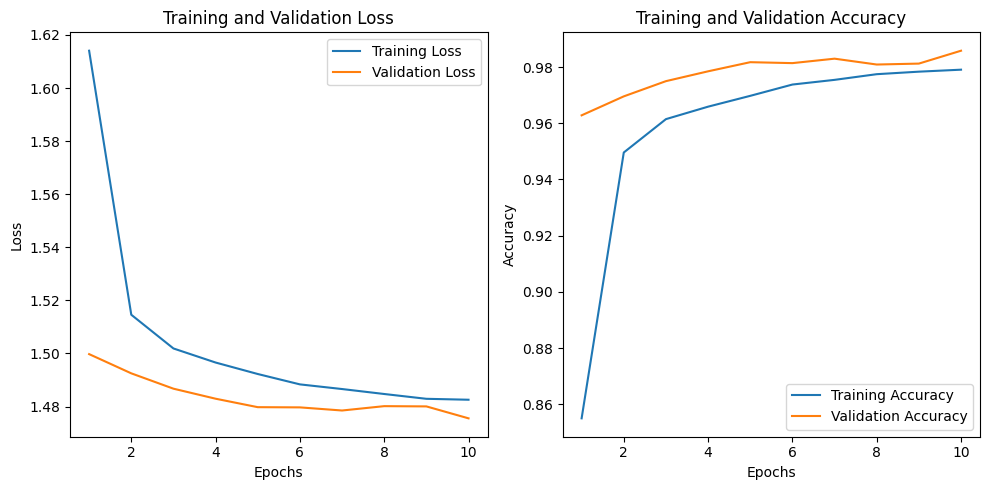

Validation Loss: 1.4755, Validation Accuracy: 0.9858
Experimenting with num_conv_layers=1, kernel_size=5, dropout_rate=0.7
Epoch [1/10], Training Loss: 1.7025, Training Accuracy: 0.7696
Validation Loss: 1.5142, Validation Accuracy: 0.9483
Epoch [2/10], Training Loss: 1.5786, Training Accuracy: 0.8873
Validation Loss: 1.4998, Validation Accuracy: 0.9623
Epoch [3/10], Training Loss: 1.5555, Training Accuracy: 0.9092
Validation Loss: 1.4944, Validation Accuracy: 0.9669
Epoch [4/10], Training Loss: 1.5422, Training Accuracy: 0.9206
Validation Loss: 1.4900, Validation Accuracy: 0.9712
Epoch [5/10], Training Loss: 1.5334, Training Accuracy: 0.9301
Validation Loss: 1.4880, Validation Accuracy: 0.9738
Epoch [6/10], Training Loss: 1.5298, Training Accuracy: 0.9333
Validation Loss: 1.4876, Validation Accuracy: 0.9732
Epoch [7/10], Training Loss: 1.5260, Training Accuracy: 0.9365
Validation Loss: 1.4846, Validation Accuracy: 0.9763
Epoch [8/10], Training Loss: 1.5221, Training Accuracy: 0.9403
Va

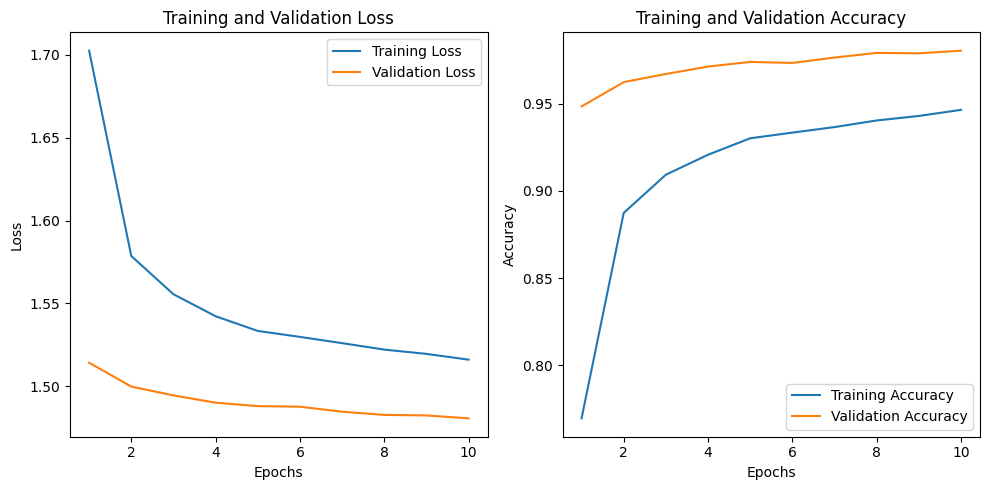

Validation Loss: 1.4806, Validation Accuracy: 0.9802
Experimenting with num_conv_layers=1, kernel_size=7, dropout_rate=0.3
Epoch [1/10], Training Loss: 1.5575, Training Accuracy: 0.9105
Validation Loss: 1.4939, Validation Accuracy: 0.9692
Epoch [2/10], Training Loss: 1.4954, Training Accuracy: 0.9677
Validation Loss: 1.4867, Validation Accuracy: 0.9751
Epoch [3/10], Training Loss: 1.4879, Training Accuracy: 0.9748
Validation Loss: 1.4797, Validation Accuracy: 0.9821
Epoch [4/10], Training Loss: 1.4832, Training Accuracy: 0.9785
Validation Loss: 1.4790, Validation Accuracy: 0.9829
Epoch [5/10], Training Loss: 1.4798, Training Accuracy: 0.9818
Validation Loss: 1.4766, Validation Accuracy: 0.9850
Epoch [6/10], Training Loss: 1.4785, Training Accuracy: 0.9830
Validation Loss: 1.4789, Validation Accuracy: 0.9823
Epoch [7/10], Training Loss: 1.4751, Training Accuracy: 0.9865
Validation Loss: 1.4803, Validation Accuracy: 0.9808
Epoch [8/10], Training Loss: 1.4759, Training Accuracy: 0.9858
Va

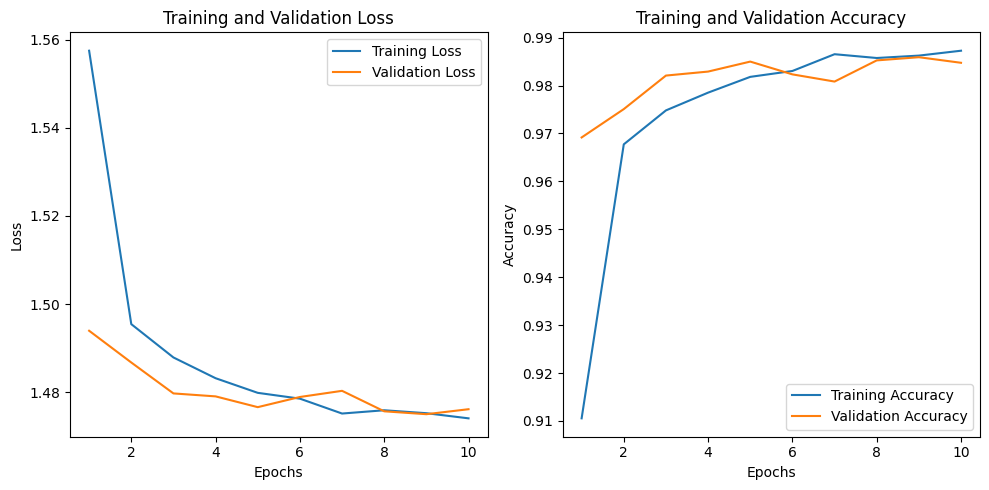

Validation Loss: 1.4761, Validation Accuracy: 0.9848
Experimenting with num_conv_layers=1, kernel_size=7, dropout_rate=0.5
Epoch [1/10], Training Loss: 1.5890, Training Accuracy: 0.8802
Validation Loss: 1.4971, Validation Accuracy: 0.9661
Epoch [2/10], Training Loss: 1.5084, Training Accuracy: 0.9555
Validation Loss: 1.4877, Validation Accuracy: 0.9747
Epoch [3/10], Training Loss: 1.4973, Training Accuracy: 0.9651
Validation Loss: 1.4824, Validation Accuracy: 0.9787
Epoch [4/10], Training Loss: 1.4935, Training Accuracy: 0.9685
Validation Loss: 1.4810, Validation Accuracy: 0.9803
Epoch [5/10], Training Loss: 1.4889, Training Accuracy: 0.9731
Validation Loss: 1.4781, Validation Accuracy: 0.9832
Epoch [6/10], Training Loss: 1.4863, Training Accuracy: 0.9757
Validation Loss: 1.4774, Validation Accuracy: 0.9838
Epoch [7/10], Training Loss: 1.4850, Training Accuracy: 0.9764
Validation Loss: 1.4773, Validation Accuracy: 0.9841
Epoch [8/10], Training Loss: 1.4832, Training Accuracy: 0.9784
Va

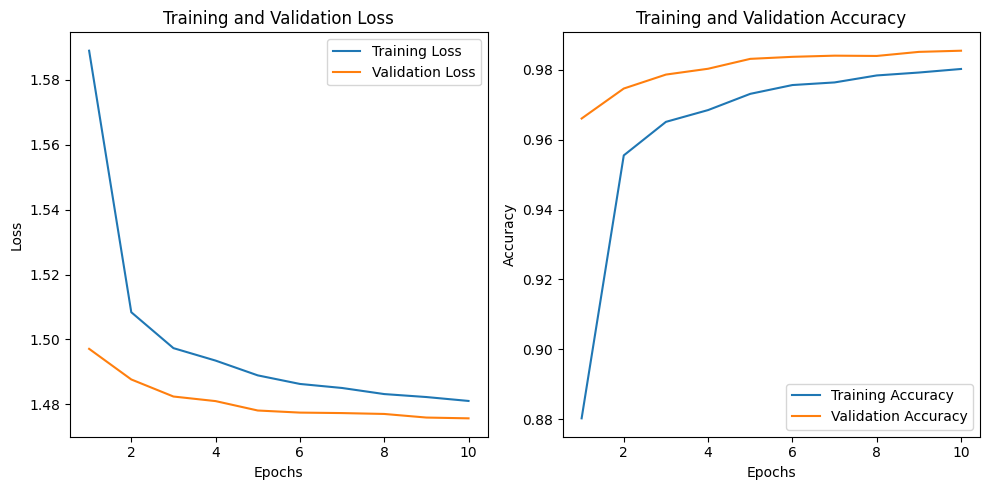

Validation Loss: 1.4757, Validation Accuracy: 0.9855
Experimenting with num_conv_layers=1, kernel_size=7, dropout_rate=0.7
Epoch [1/10], Training Loss: 1.6739, Training Accuracy: 0.7966
Validation Loss: 1.5084, Validation Accuracy: 0.9541
Epoch [2/10], Training Loss: 1.5635, Training Accuracy: 0.9015
Validation Loss: 1.4971, Validation Accuracy: 0.9647
Epoch [3/10], Training Loss: 1.5417, Training Accuracy: 0.9221
Validation Loss: 1.4936, Validation Accuracy: 0.9683
Epoch [4/10], Training Loss: 1.5316, Training Accuracy: 0.9312
Validation Loss: 1.4876, Validation Accuracy: 0.9738
Epoch [5/10], Training Loss: 1.5236, Training Accuracy: 0.9387
Validation Loss: 1.4869, Validation Accuracy: 0.9745
Epoch [6/10], Training Loss: 1.5202, Training Accuracy: 0.9419
Validation Loss: 1.4852, Validation Accuracy: 0.9758
Epoch [7/10], Training Loss: 1.5161, Training Accuracy: 0.9458
Validation Loss: 1.4829, Validation Accuracy: 0.9781
Epoch [8/10], Training Loss: 1.5134, Training Accuracy: 0.9485
Va

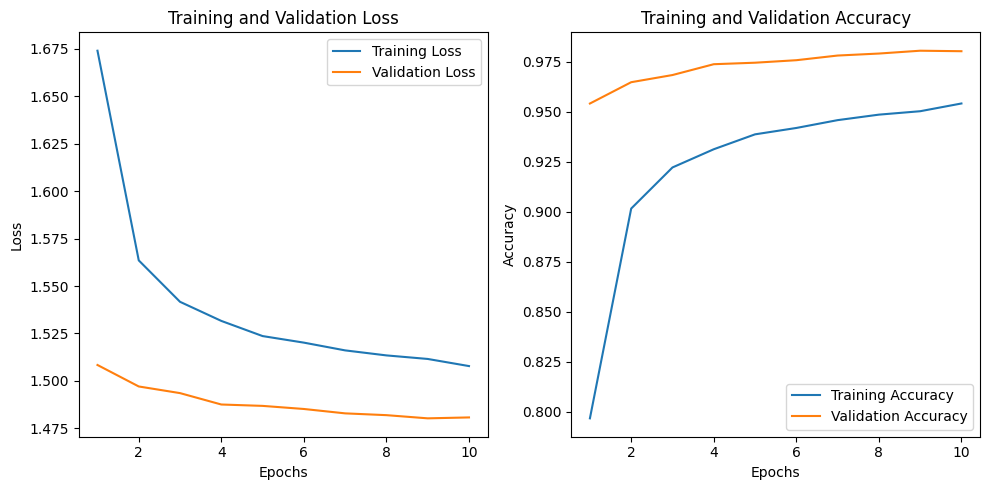

Validation Loss: 1.4808, Validation Accuracy: 0.9802
Experimenting with num_conv_layers=2, kernel_size=3, dropout_rate=0.3
Epoch [1/10], Training Loss: 1.6051, Training Accuracy: 0.8606
Validation Loss: 1.4957, Validation Accuracy: 0.9660
Epoch [2/10], Training Loss: 1.4984, Training Accuracy: 0.9639
Validation Loss: 1.4857, Validation Accuracy: 0.9757
Epoch [3/10], Training Loss: 1.4893, Training Accuracy: 0.9726
Validation Loss: 1.4854, Validation Accuracy: 0.9756
Epoch [4/10], Training Loss: 1.4845, Training Accuracy: 0.9772
Validation Loss: 1.4815, Validation Accuracy: 0.9800
Epoch [5/10], Training Loss: 1.4811, Training Accuracy: 0.9806
Validation Loss: 1.4788, Validation Accuracy: 0.9819
Epoch [6/10], Training Loss: 1.4803, Training Accuracy: 0.9812
Validation Loss: 1.4768, Validation Accuracy: 0.9842
Epoch [7/10], Training Loss: 1.4785, Training Accuracy: 0.9827
Validation Loss: 1.4790, Validation Accuracy: 0.9822
Epoch [8/10], Training Loss: 1.4770, Training Accuracy: 0.9844
Va

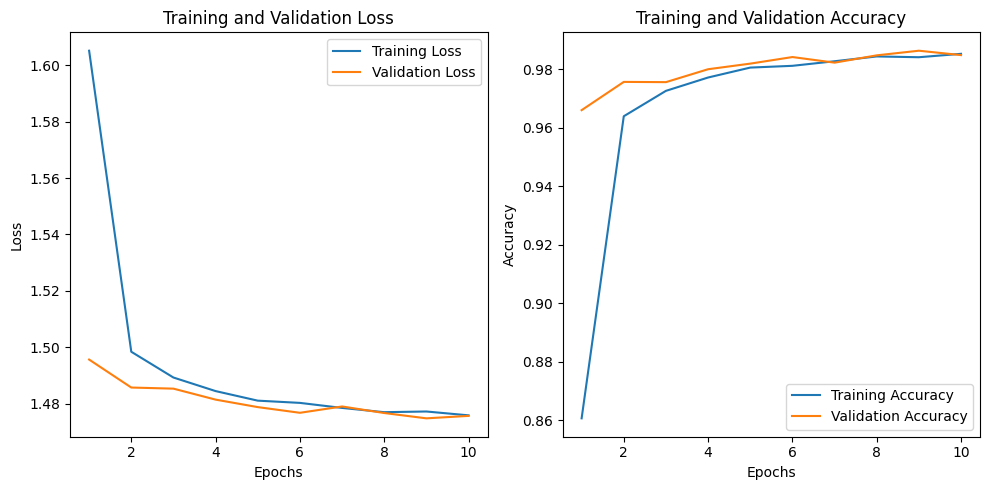

Validation Loss: 1.4757, Validation Accuracy: 0.9848
Experimenting with num_conv_layers=2, kernel_size=3, dropout_rate=0.5
Epoch [1/10], Training Loss: 1.5785, Training Accuracy: 0.8885
Validation Loss: 1.5001, Validation Accuracy: 0.9615
Epoch [2/10], Training Loss: 1.5081, Training Accuracy: 0.9547
Validation Loss: 1.4888, Validation Accuracy: 0.9724
Epoch [3/10], Training Loss: 1.4977, Training Accuracy: 0.9638
Validation Loss: 1.4851, Validation Accuracy: 0.9766
Epoch [4/10], Training Loss: 1.4924, Training Accuracy: 0.9696
Validation Loss: 1.4800, Validation Accuracy: 0.9813
Epoch [5/10], Training Loss: 1.4886, Training Accuracy: 0.9730
Validation Loss: 1.4791, Validation Accuracy: 0.9820
Epoch [6/10], Training Loss: 1.4873, Training Accuracy: 0.9742
Validation Loss: 1.4770, Validation Accuracy: 0.9841
Epoch [7/10], Training Loss: 1.4835, Training Accuracy: 0.9781
Validation Loss: 1.4761, Validation Accuracy: 0.9853
Epoch [8/10], Training Loss: 1.4827, Training Accuracy: 0.9788
Va

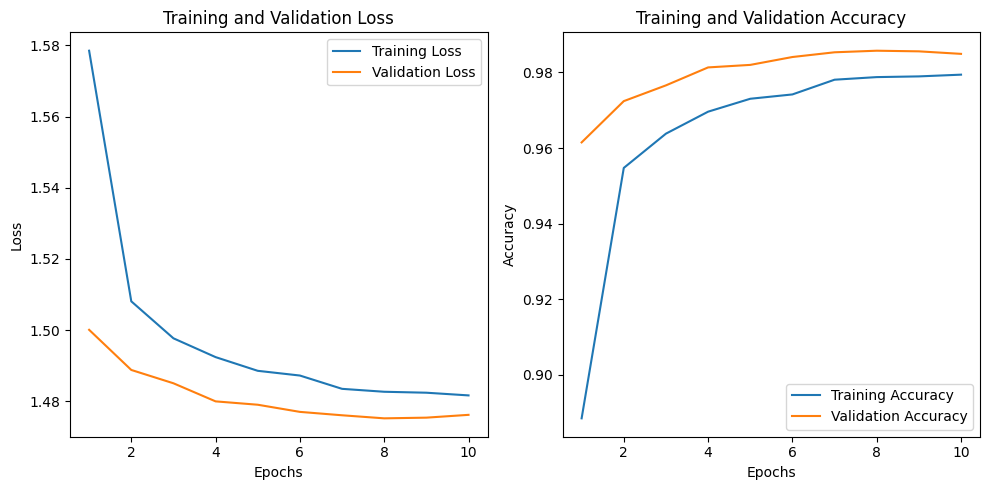

Validation Loss: 1.4762, Validation Accuracy: 0.9849
Experimenting with num_conv_layers=2, kernel_size=3, dropout_rate=0.7
Epoch [1/10], Training Loss: 1.6820, Training Accuracy: 0.7852
Validation Loss: 1.5051, Validation Accuracy: 0.9571
Epoch [2/10], Training Loss: 1.5677, Training Accuracy: 0.8951
Validation Loss: 1.4956, Validation Accuracy: 0.9660
Epoch [3/10], Training Loss: 1.5480, Training Accuracy: 0.9143
Validation Loss: 1.4879, Validation Accuracy: 0.9736
Epoch [4/10], Training Loss: 1.5358, Training Accuracy: 0.9269
Validation Loss: 1.4861, Validation Accuracy: 0.9745
Epoch [5/10], Training Loss: 1.5320, Training Accuracy: 0.9301
Validation Loss: 1.4865, Validation Accuracy: 0.9746
Epoch [6/10], Training Loss: 1.5245, Training Accuracy: 0.9374
Validation Loss: 1.4814, Validation Accuracy: 0.9794
Epoch [7/10], Training Loss: 1.5214, Training Accuracy: 0.9403
Validation Loss: 1.4815, Validation Accuracy: 0.9798
Epoch [8/10], Training Loss: 1.5186, Training Accuracy: 0.9430
Va

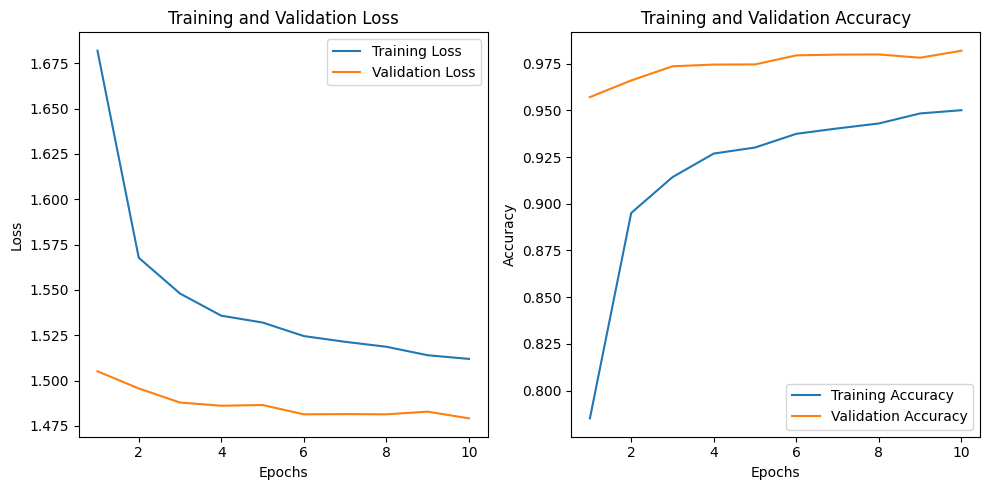

Validation Loss: 1.4792, Validation Accuracy: 0.9819
Experimenting with num_conv_layers=2, kernel_size=5, dropout_rate=0.3
Epoch [1/10], Training Loss: 1.5662, Training Accuracy: 0.8975
Validation Loss: 1.4940, Validation Accuracy: 0.9683
Epoch [2/10], Training Loss: 1.4944, Training Accuracy: 0.9675
Validation Loss: 1.4868, Validation Accuracy: 0.9751
Epoch [3/10], Training Loss: 1.4876, Training Accuracy: 0.9740
Validation Loss: 1.4790, Validation Accuracy: 0.9824
Epoch [4/10], Training Loss: 1.4822, Training Accuracy: 0.9793
Validation Loss: 1.4793, Validation Accuracy: 0.9819
Epoch [5/10], Training Loss: 1.4808, Training Accuracy: 0.9805
Validation Loss: 1.4768, Validation Accuracy: 0.9842
Epoch [6/10], Training Loss: 1.4786, Training Accuracy: 0.9824
Validation Loss: 1.4772, Validation Accuracy: 0.9835
Epoch [7/10], Training Loss: 1.4765, Training Accuracy: 0.9849
Validation Loss: 1.4788, Validation Accuracy: 0.9822
Epoch [8/10], Training Loss: 1.4765, Training Accuracy: 0.9845
Va

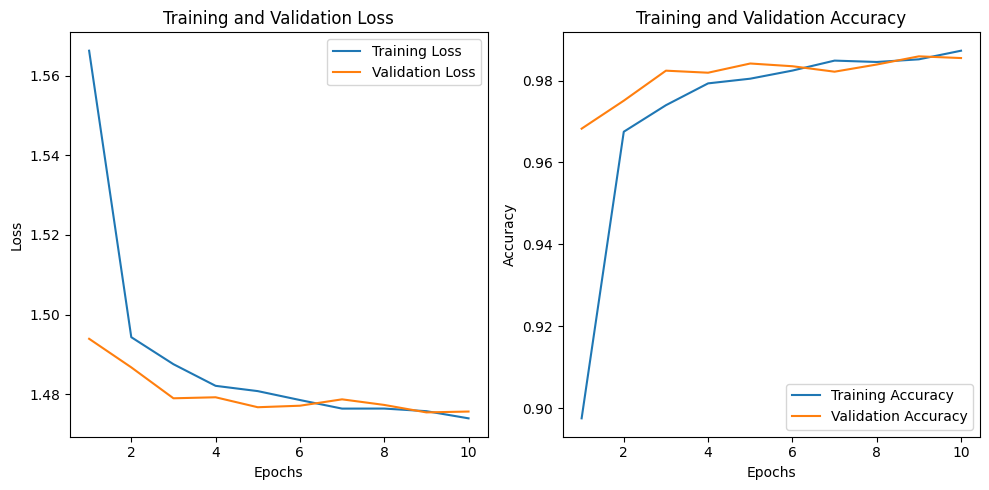

Validation Loss: 1.4757, Validation Accuracy: 0.9855
Experimenting with num_conv_layers=2, kernel_size=5, dropout_rate=0.5
Epoch [1/10], Training Loss: 1.5780, Training Accuracy: 0.8876
Validation Loss: 1.4964, Validation Accuracy: 0.9648
Epoch [2/10], Training Loss: 1.5091, Training Accuracy: 0.9534
Validation Loss: 1.4891, Validation Accuracy: 0.9722
Epoch [3/10], Training Loss: 1.4983, Training Accuracy: 0.9638
Validation Loss: 1.4842, Validation Accuracy: 0.9771
Epoch [4/10], Training Loss: 1.4931, Training Accuracy: 0.9684
Validation Loss: 1.4802, Validation Accuracy: 0.9809
Epoch [5/10], Training Loss: 1.4894, Training Accuracy: 0.9722
Validation Loss: 1.4780, Validation Accuracy: 0.9831
Epoch [6/10], Training Loss: 1.4859, Training Accuracy: 0.9753
Validation Loss: 1.4788, Validation Accuracy: 0.9827
Epoch [7/10], Training Loss: 1.4856, Training Accuracy: 0.9755
Validation Loss: 1.4763, Validation Accuracy: 0.9851
Epoch [8/10], Training Loss: 1.4833, Training Accuracy: 0.9780
Va

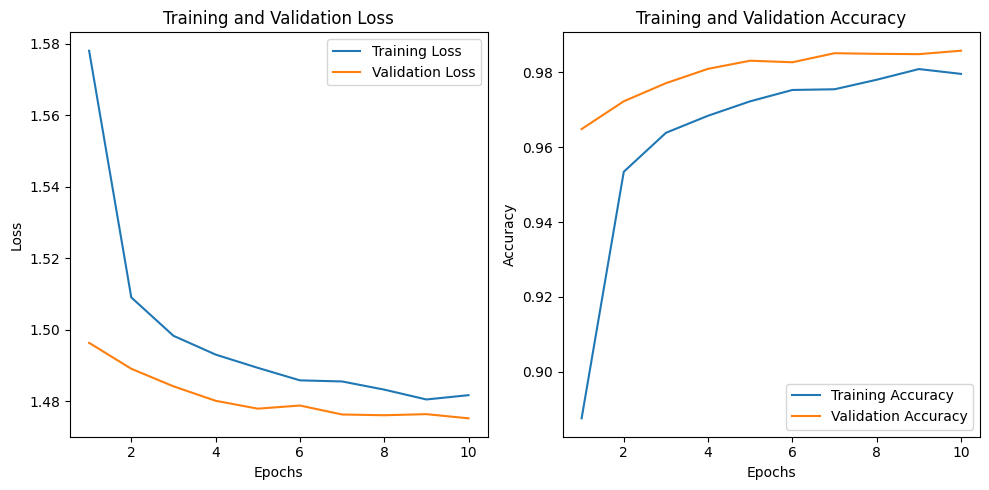

Validation Loss: 1.4753, Validation Accuracy: 0.9858
Experimenting with num_conv_layers=2, kernel_size=5, dropout_rate=0.7
Epoch [1/10], Training Loss: 1.6236, Training Accuracy: 0.8415
Validation Loss: 1.4988, Validation Accuracy: 0.9625
Epoch [2/10], Training Loss: 1.5435, Training Accuracy: 0.9193
Validation Loss: 1.4917, Validation Accuracy: 0.9694
Epoch [3/10], Training Loss: 1.5294, Training Accuracy: 0.9325
Validation Loss: 1.4857, Validation Accuracy: 0.9755
Epoch [4/10], Training Loss: 1.5199, Training Accuracy: 0.9419
Validation Loss: 1.4830, Validation Accuracy: 0.9781
Epoch [5/10], Training Loss: 1.5136, Training Accuracy: 0.9487
Validation Loss: 1.4836, Validation Accuracy: 0.9777
Epoch [6/10], Training Loss: 1.5104, Training Accuracy: 0.9516
Validation Loss: 1.4824, Validation Accuracy: 0.9788
Epoch [7/10], Training Loss: 1.5053, Training Accuracy: 0.9563
Validation Loss: 1.4779, Validation Accuracy: 0.9834
Epoch [8/10], Training Loss: 1.5025, Training Accuracy: 0.9591
Va

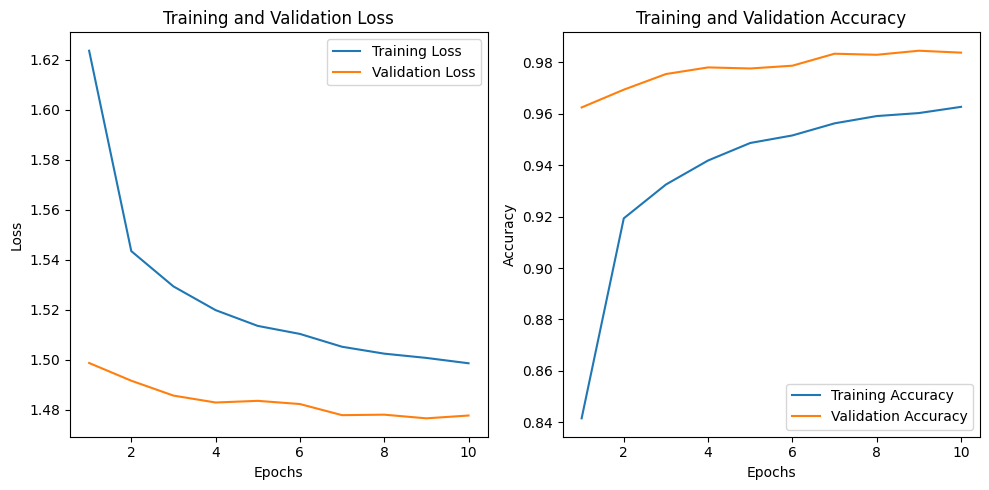

Validation Loss: 1.4778, Validation Accuracy: 0.9838
Experimenting with num_conv_layers=2, kernel_size=7, dropout_rate=0.3
Epoch [1/10], Training Loss: 1.5480, Training Accuracy: 0.9161
Validation Loss: 1.4915, Validation Accuracy: 0.9693
Epoch [2/10], Training Loss: 1.4944, Training Accuracy: 0.9670
Validation Loss: 1.4863, Validation Accuracy: 0.9750
Epoch [3/10], Training Loss: 1.4858, Training Accuracy: 0.9758
Validation Loss: 1.4893, Validation Accuracy: 0.9724
Epoch [4/10], Training Loss: 1.4843, Training Accuracy: 0.9770
Validation Loss: 1.4864, Validation Accuracy: 0.9748
Epoch [5/10], Training Loss: 1.4820, Training Accuracy: 0.9792
Validation Loss: 1.4779, Validation Accuracy: 0.9835
Epoch [6/10], Training Loss: 1.4810, Training Accuracy: 0.9801
Validation Loss: 1.4762, Validation Accuracy: 0.9851
Epoch [7/10], Training Loss: 1.4808, Training Accuracy: 0.9804
Validation Loss: 1.4788, Validation Accuracy: 0.9822
Epoch [8/10], Training Loss: 1.4787, Training Accuracy: 0.9825
Va

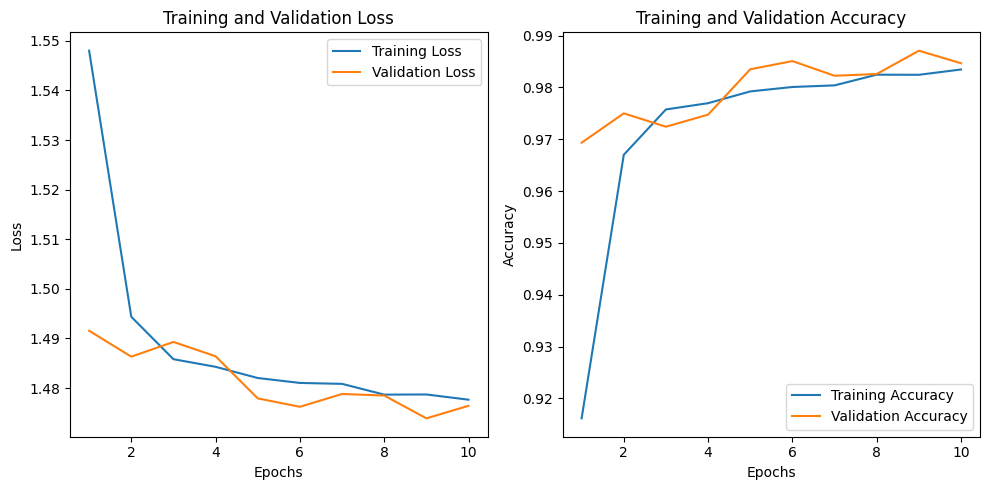

Validation Loss: 1.4764, Validation Accuracy: 0.9847
Experimenting with num_conv_layers=2, kernel_size=7, dropout_rate=0.5
Epoch [1/10], Training Loss: 1.5803, Training Accuracy: 0.8849
Validation Loss: 1.4917, Validation Accuracy: 0.9701
Epoch [2/10], Training Loss: 1.4984, Training Accuracy: 0.9635
Validation Loss: 1.4819, Validation Accuracy: 0.9797
Epoch [3/10], Training Loss: 1.4906, Training Accuracy: 0.9709
Validation Loss: 1.4844, Validation Accuracy: 0.9769
Epoch [4/10], Training Loss: 1.4866, Training Accuracy: 0.9747
Validation Loss: 1.4757, Validation Accuracy: 0.9854
Epoch [5/10], Training Loss: 1.4841, Training Accuracy: 0.9775
Validation Loss: 1.4789, Validation Accuracy: 0.9821
Epoch [6/10], Training Loss: 1.4822, Training Accuracy: 0.9788
Validation Loss: 1.4764, Validation Accuracy: 0.9848
Epoch [7/10], Training Loss: 1.4820, Training Accuracy: 0.9792
Validation Loss: 1.4763, Validation Accuracy: 0.9848
Epoch [8/10], Training Loss: 1.4809, Training Accuracy: 0.9804
Va

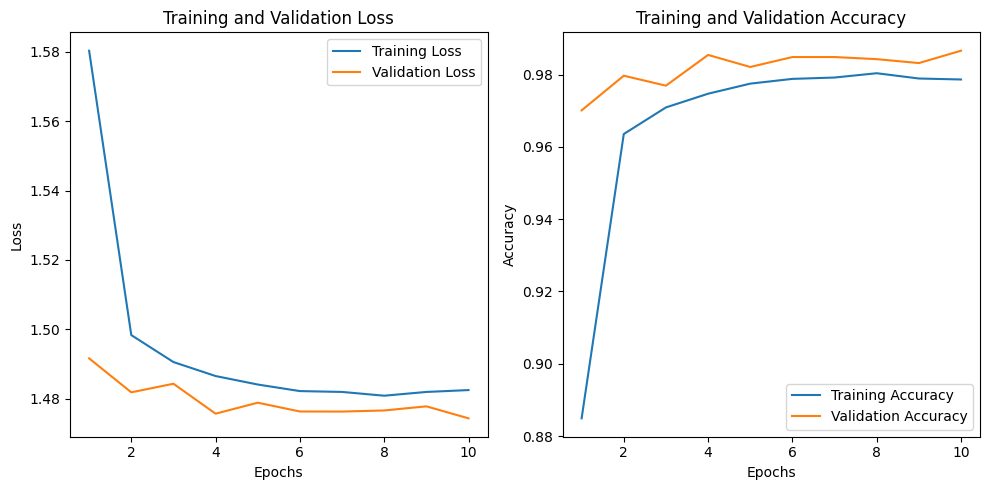

Validation Loss: 1.4744, Validation Accuracy: 0.9866
Experimenting with num_conv_layers=2, kernel_size=7, dropout_rate=0.7
Epoch [1/10], Training Loss: 1.6426, Training Accuracy: 0.8229
Validation Loss: 1.4951, Validation Accuracy: 0.9663
Epoch [2/10], Training Loss: 1.5438, Training Accuracy: 0.9191
Validation Loss: 1.4917, Validation Accuracy: 0.9699
Epoch [3/10], Training Loss: 1.5280, Training Accuracy: 0.9339
Validation Loss: 1.4848, Validation Accuracy: 0.9762
Epoch [4/10], Training Loss: 1.5178, Training Accuracy: 0.9437
Validation Loss: 1.4826, Validation Accuracy: 0.9787
Epoch [5/10], Training Loss: 1.5108, Training Accuracy: 0.9507
Validation Loss: 1.4803, Validation Accuracy: 0.9805
Epoch [6/10], Training Loss: 1.5094, Training Accuracy: 0.9516


In [ ]:
import os
from google.colab import drive

# Directory to save models in Google Drive
save_dir = "/content/drive/MyDrive/Run-2 Trained Models"
os.makedirs(save_dir, exist_ok=True)

# Experiment with hyperparameters
best_accuracy = 0.0
best_hyperparameters = None
for num_conv_layers in num_conv_layers_list:
    for kernel_size in kernel_size_list:
        for dropout_rate in dropout_rate_list:
            print(f"Experimenting with num_conv_layers={num_conv_layers}, kernel_size={kernel_size}, dropout_rate={dropout_rate}")
            model = CNN(num_conv_layers=num_conv_layers, kernel_size=kernel_size, dropout_rate=dropout_rate)
            criterion = nn.CrossEntropyLoss()
            optimizer = optim.Adam(model.parameters(), lr=0.001)
            train_model(model, train_loader, val_loader, criterion, optimizer)
            _, accuracy = evaluate_model(model, val_loader, criterion)
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_hyperparameters = (num_conv_layers, kernel_size, dropout_rate)
            # Save model
            model_name = f"model_conv_{num_conv_layers}_kern_{kernel_size}_drop_{dropout_rate}.pth"
            model_path = os.path.join(save_dir, model_name)
            torch.save(model.state_dict(), model_path)

print(f"Best hyperparameters: num_conv_layers={best_hyperparameters[0]}, kernel_size={best_hyperparameters[1]}, dropout_rate={best_hyperparameters[2]}")
print(f"Final Validation Accuracy: {best_accuracy:.4f}")

Experimenting with num_conv_layers=2, kernel_size=7, dropout_rate=0.7
Epoch [1/10], Training Loss: 1.6497, Training Accuracy: 0.8158
Validation Loss: 1.4986, Validation Accuracy: 0.9622
Epoch [2/10], Training Loss: 1.5481, Training Accuracy: 0.9143
Validation Loss: 1.4886, Validation Accuracy: 0.9723
Epoch [3/10], Training Loss: 1.5303, Training Accuracy: 0.9318
Validation Loss: 1.4872, Validation Accuracy: 0.9740
Epoch [4/10], Training Loss: 1.5209, Training Accuracy: 0.9405
Validation Loss: 1.4882, Validation Accuracy: 0.9723
Epoch [5/10], Training Loss: 1.5139, Training Accuracy: 0.9474
Validation Loss: 1.4811, Validation Accuracy: 0.9797
Epoch [6/10], Training Loss: 1.5085, Training Accuracy: 0.9526
Validation Loss: 1.4799, Validation Accuracy: 0.9814
Epoch [7/10], Training Loss: 1.5050, Training Accuracy: 0.9560
Validation Loss: 1.4786, Validation Accuracy: 0.9826
Epoch [8/10], Training Loss: 1.5002, Training Accuracy: 0.9609
Validation Loss: 1.4782, Validation Accuracy: 0.9830
Ep

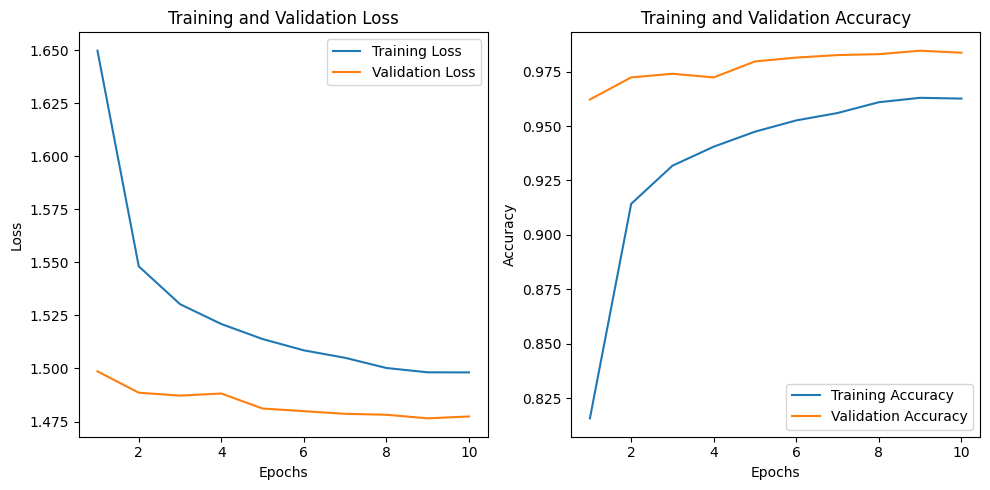

Validation Loss: 1.4774, Validation Accuracy: 0.9837


NameError: name 'best_hyperparameters' is not defined

In [31]:
# import os
# from google.colab import drive

# # Directory to save models in Google Drive
# save_dir = "/content/drive/MyDrive/Run-2 Trained Models"
# os.makedirs(save_dir, exist_ok=True)

# # Experiment with hyperparameters
# best_accuracy = 0.0
# print(f"Experimenting with num_conv_layers={2}, kernel_size={7}, dropout_rate={0.7}")
# model = CNN(num_conv_layers=2, kernel_size=7, dropout_rate=0.7)
# criterion = nn.CrossEntropyLoss()
# optimizer = optim.Adam(model.parameters(), lr=0.001)
# train_model(model, train_loader, val_loader, criterion, optimizer)
# _, accuracy = evaluate_model(model, val_loader, criterion)
# if accuracy > best_accuracy:
#     best_accuracy = accuracy
# # Save model
# model_name = f"model_conv_{num_conv_layers}_kern_{kernel_size}_drop_{dropout_rate}.pth"
# model_path = os.path.join(save_dir, model_name)
# torch.save(model.state_dict(), model_path)

# #print(f"Best hyperparameters: num_conv_layers={best_hyperparameters[0]}, kernel_size={best_hyperparameters[1]}, dropout_rate={best_hyperparameters[2]}")
# print(f"Final Validation Accuracy: {best_accuracy:.4f}")

In [45]:
# # Function to get feature maps from a specific layer
# def get_feature_maps(model, image, layer_num):
#     layer_outputs = []
#     for i, layer in enumerate(model.modules()):
#         if i <= layer_num:
#             image = layer(image)
#         else:
#             break
#         layer_outputs.append(image)
#     return layer_outputs

# def predict_with_visualization(model, test_loader):
#     model.eval()
#     all_predictions = []
#     with torch.no_grad():
#         for image, _ in test_loader:
#             # Get predictions
#             outputs = model(image)
#             _, predicted = torch.max(outputs, 1)
#             all_predictions.extend(predicted.tolist())

#             # Visualize feature maps for the first image only
#             first_conv_outputs = get_feature_maps(model.clone(), image.clone(), 1)[0]
#             last_conv_outputs = get_feature_maps(model.clone(), image.clone(), -1)[0]

#             plot_feature_maps(first_conv_outputs)
#             plot_feature_maps(last_conv_outputs)
#             break  # Visualize only for the first image

#     return all_predictions

# def plot_feature_maps(feature_maps):
#     num_maps = feature_maps.shape[1]
#     fig, axes = plt.subplots(1, num_maps, figsize=(15, 5))
#     for i in range(num_maps):
#         axes[i].imshow(feature_maps[0, i], cmap='gray')
#         axes[i].set_title(f"Filter {i+1}")
#         axes[i].axis('off')
#     plt.tight_layout()
#     plt.show()

In [42]:
def predict(model, test_loader):
    model.eval()
    all_predictions = []
    all_images = []
    with torch.no_grad():
        for inputs in test_loader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            all_predictions.extend(predicted.tolist())
    return all_predictions

In [43]:
# def visualize_feature_maps(model, image):
#     model.eval()
#     with torch.no_grad():
#         # Add a batch dimension and convert to tensor
#         image = torch.unsqueeze(torch.tensor(image), 0)

#         # Get the predictions and intermediate feature maps
#         _, intermediate_outputs = model(image)

#         # Visualize the intermediate feature maps
#         for i, intermediate_output in enumerate(intermediate_outputs):
#             num_filters = intermediate_output.size(1)
#             fig, axs = plt.subplots(1, num_filters, figsize=(20, 2))
#             for j in range(num_filters):
#                 axs[j].imshow(intermediate_output[0, j].detach().cpu().numpy(), cmap='gray')
#                 axs[j].axis('off')
#             plt.suptitle(f"Convolution Layer {i+1} Feature Maps")
#             plt.show()

#Training with best hyperparameters and predictions

Accuracies: 
1. Experimenting with num_conv_layers=1, kernel_size=3, dropout_rate=0.3 --- Validation Accuracy: 0.9818
2. Experimenting with num_conv_layers=1, kernel_size=3, dropout_rate=0.5 --- Validation Accuracy: 0.9803 --- The higher dropout rate might be causing slightly more regularization, which could be affecting the model's ability to learn.
3. Experimenting with num_conv_layers=1, kernel_size=3, dropout_rate=0.7 --- Validation Accuracy: 0.9746 --- The high dropout rate might be too aggressive, leading to underfitting and lower performance.
4. Experimenting with num_conv_layers=1, kernel_size=5, dropout_rate=0.3 --- Validation Accuracy: 0.9852 --- The larger kernel size allows the model to capture more complex patterns, leading to improved performance.
5. Experimenting with num_conv_layers=1, kernel_size=5, dropout_rate=0.5 --- Validation Accuracy: 0.9858 --- The dropout rate of 0.5 provides moderate regularization without being too aggressive.
6. Experimenting with num_conv_layers=1, kernel_size=5, dropout_rate=0.7 --- Validation Accuracy: 0.9802 --- The high dropout rate might be causing too much regularization, leading to underfitting.
7. Experimenting with num_conv_layers=1, kernel_size=7, dropout_rate=0.3 --- Validation Accuracy: 0.9848 --- 
8. Experimenting with num_conv_layers=1, kernel_size=7, dropout_rate=0.5 --- Validation Accuracy: 0.9855 --- Accuracy slightly higher than combination 7. The dropout rate of 0.5 provides a good balance of regularization.
9. Experimenting with num_conv_layers=1, kernel_size=7, dropout_rate=0.7 --- Validation Accuracy: 0.9802 --- The high dropout rate might be too aggressive for this configuration.
10. Experimenting with num_conv_layers=2, kernel_size=3, dropout_rate=0.3 --- Validation Accuracy: 0.9848
11. Experimenting with num_conv_layers=2, kernel_size=3, dropout_rate=0.5 --- Validation Accuracy: 0.9849
12. Experimenting with num_conv_layers=2, kernel_size=3, dropout_rate=0.7 --- Validation Accuracy: 0.9819
13. Experimenting with num_conv_layers=2, kernel_size=5, dropout_rate=0.3 --- Validation Accuracy: 0.9855
14. Experimenting with num_conv_layers=2, kernel_size=5, dropout_rate=0.5 --- Validation Accuracy: 0.9858
15. Experimenting with num_conv_layers=2, kernel_size=5, dropout_rate=0.7 --- Validation Accuracy: 0.9838
16. Experimenting with num_conv_layers=2, kernel_size=7, dropout_rate=0.3 --- Validation Accuracy: 0.9847
17. Experimenting with num_conv_layers=2, kernel_size=7, dropout_rate=0.5 --- Validation Accuracy: 0.9866 --- Better accuracy. The two convolutional layers allow the model to learn more complex features and patterns in the data. This increased depth can help the model better discriminate between different digits in the MNIST dataset. The larger kernel size of 7 allows the model to capture more spatial information in the input images. This can be particularly beneficial for recognizing the intricate details present in handwritten digits. The dropout rate of 0.5 provides a moderate level of regularization, preventing overfitting and improving the model's generalization ability.
18. Experimenting with num_conv_layers=2, kernel_size=7, dropout_rate=0.7 --- Validation Accuracy: 0.9837

Using the best parameters based on validation accuracy:

num_conv_layers = 2 <br>
kernel_size = 7 <br>
dropout_rate = 0.5 <br>

Using best hyperparameters: num_conv_layers=2, kernel_size=7, dropout_rate=0.5
Epoch [1/10], Training Loss: 1.5579, Training Accuracy: 0.9071
Validation Loss: 1.4907, Validation Accuracy: 0.9699
Epoch [2/10], Training Loss: 1.4970, Training Accuracy: 0.9649
Validation Loss: 1.4823, Validation Accuracy: 0.9788
Epoch [3/10], Training Loss: 1.4892, Training Accuracy: 0.9723
Validation Loss: 1.4798, Validation Accuracy: 0.9818
Epoch [4/10], Training Loss: 1.4852, Training Accuracy: 0.9764
Validation Loss: 1.4774, Validation Accuracy: 0.9838
Epoch [5/10], Training Loss: 1.4821, Training Accuracy: 0.9791
Validation Loss: 1.4758, Validation Accuracy: 0.9855
Epoch [6/10], Training Loss: 1.4814, Training Accuracy: 0.9799
Validation Loss: 1.4752, Validation Accuracy: 0.9860
Epoch [7/10], Training Loss: 1.4810, Training Accuracy: 0.9801
Validation Loss: 1.4759, Validation Accuracy: 0.9852
Epoch [8/10], Training Loss: 1.4801, Training Accuracy: 0.9811
Validation Loss: 1.4772, Validation Accuracy: 

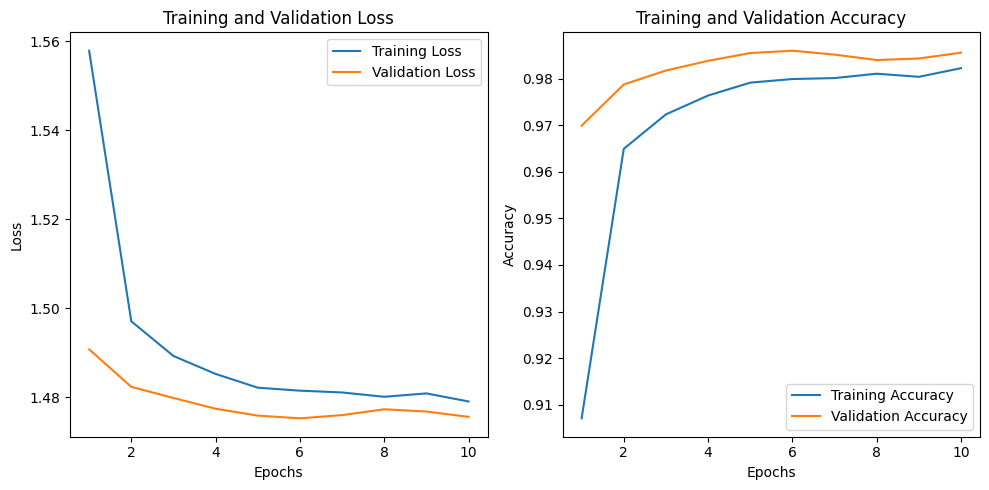

In [47]:
num_conv_layers, kernel_size, dropout_rate = best_hyperparameters #2, 7, 0.5 #best_hyperparameters

print(f"Using best hyperparameters: num_conv_layers={num_conv_layers}, kernel_size={kernel_size}, dropout_rate={dropout_rate}")

# Instantiate the model with the best hyperparameters
model = CNN(num_conv_layers=num_conv_layers, kernel_size=kernel_size, dropout_rate=dropout_rate)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model with the entire training dataset
train_model(model, train_loader, val_loader, criterion, optimizer)

torch.save(model.state_dict(), 'trained_model.pth')

In [92]:
# Use the predict_with_images function to get predictions and images
predictions = predict(model, test_loader)
print(predictions)
print(len(predictions))

[1, 2, 2, 5, 3, 5, 0, 6, 1, 4, 8, 0, 6, 9, 1, 8, 7, 7, 5, 4, 6, 7, 7, 5, 3, 1, 9, 1, 6, 4, 1, 0, 2, 3, 6, 0, 0, 2, 0, 0, 8, 0, 5, 4, 2, 9, 7, 8, 9, 0, 3, 0, 9, 8, 6, 2, 1, 1, 5, 1, 6, 9, 8, 5, 9, 4, 0, 1, 4, 4, 5, 5, 6, 3, 3, 3, 3, 6, 4, 2, 2, 9, 7, 2, 6, 3, 6, 9, 8, 6, 5, 0, 2, 0, 1, 9, 9, 5, 9, 8, 9, 2, 4, 9, 5, 9, 6, 2, 3, 2, 6, 3, 6, 6, 2, 5, 1, 4, 1, 5, 6, 4, 3, 5, 2, 1, 9, 4, 3, 7, 1, 2, 1, 2, 3, 3, 9, 9, 7, 7, 2, 6, 7, 3, 0, 6, 9, 8, 1, 0, 9, 8, 4, 4, 8, 7, 2, 6, 3, 7, 5, 0, 5, 3, 0, 5, 0, 2, 5, 3, 5, 1, 5, 4, 2, 2, 6, 2, 6, 0, 2, 7, 9, 5, 1, 2, 8, 4, 3, 5, 3, 4, 1, 5, 3, 2, 2, 2, 0, 4, 6, 1, 1, 5, 6, 3, 0, 8, 2, 5, 2, 5, 4, 7, 1, 6, 2, 9, 6, 0, 8, 8, 4, 1, 3, 9, 1, 7, 1, 7, 8, 6, 0, 4, 1, 6, 0, 3, 4, 5, 1, 2, 5, 9, 3, 2, 0, 9, 6, 8, 9, 3, 4, 2, 7, 5, 6, 6, 6, 1, 5, 6, 4, 4, 4, 8, 8, 1, 2, 0, 4, 6, 2, 4, 0, 6, 5, 9, 1, 9, 1, 1, 4, 0, 3, 0, 2, 5, 3, 6, 6, 5, 5, 6, 0, 6, 0, 4, 0, 5, 1, 1, 7, 6, 6, 7, 9, 9, 2, 5, 3, 6, 0, 9, 3, 4, 4, 8, 4, 7, 2, 2, 1, 1, 0, 4, 1, 2, 1, 6, 1, 9, 7, 

#Filter Visualization

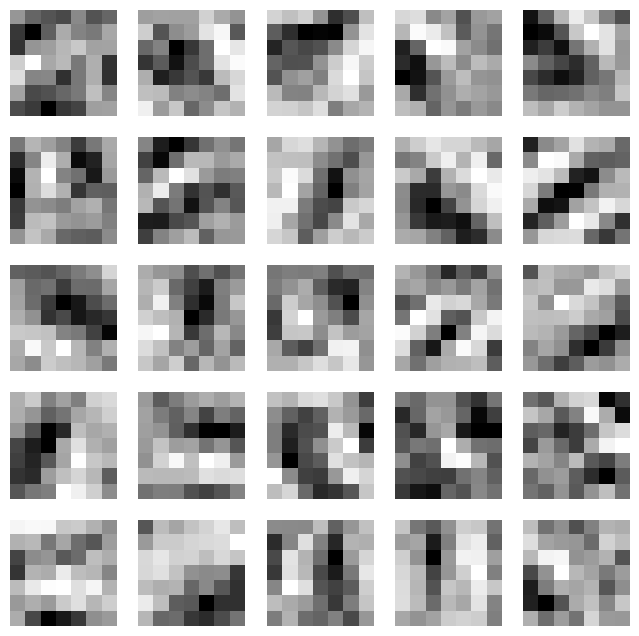

In [93]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

# Assuming `cnn_model` is an instance of your CNN model in PyTorch
# This line extracts the weights from the first convolutional layer
conv1_weights = model.conv_layers[0].weight.data

# This line determines the number of filters (kernels)
num_filters = conv1_weights.shape[0]

# This line plots the convolution kernels
fig, axs = plt.subplots(5, 5, figsize=(8, 8))

for i in range(min(num_filters, 25)):
    filter_weights = conv1_weights[i].cpu().numpy()
    # Select the first channel and reshape to 2D array
    filter_weights = filter_weights[0]
    axs[i // 5, i % 5].imshow(filter_weights, cmap='gray')
    axs[i // 5, i % 5].axis('off')

plt.show()


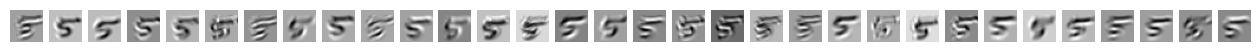

In [94]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import random

# Assuming `cnn_model` is an instance of your CNN model in PyTorch
# This line extracts the output of the first convolutional layer
activation = None

def hook(module, input, output):
    global activation
    activation = output

model.conv_layers[0].register_forward_hook(hook)

# Choose a random batch index
random_batch_index = random.randint(0, len(train_loader) - 1)
# Get a random batch from the training loader
for batch_idx, (input_images, _) in enumerate(train_loader):
    if batch_idx == random_batch_index:
        # Choose a random image index within the batch
        random_image_index = random.randint(0, len(input_images) - 1)
        input_image = input_images[random_image_index].unsqueeze(0)
        break

# This line gets the activation of the first convolutional layer for the input image
with torch.no_grad():
    _ = model(input_image)

# This line plots the feature maps
num_filters = activation.shape[1]
fig, axs = plt.subplots(1, num_filters, figsize=(16, 16))

for i in range(num_filters):
    axs[i].imshow(activation[0, i].cpu().numpy(), cmap='gray')
    axs[i].axis('off')

plt.show()


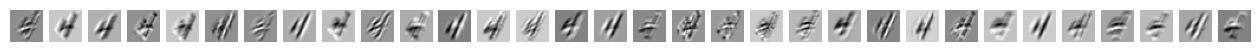

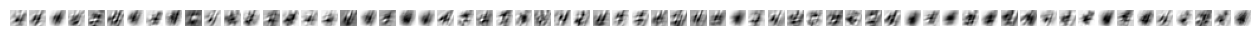

In [95]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import random

# Assuming `cnn_model` is an instance of your CNN model in PyTorch
# This line extracts the output of the first and last convolutional layers
activation_first = None
activation_last = None

def hook_first(module, input, output):
    global activation_first
    activation_first = output

def hook_last(module, input, output):
    global activation_last
    activation_last = output

model.conv_layers[0].register_forward_hook(hook_first)
model.conv_layers[-1].register_forward_hook(hook_last)

# Choose a random image index from the training set
random_image_index = random.randint(0, len(train_dataset) - 1)
input_image, _ = train_dataset[random_image_index]
input_image = input_image.unsqueeze(0)  # Add batch dimension

# This line gets the activation of the first convolutional layer for the input image
with torch.no_grad():
    _ = model(input_image)

# This line plots the feature maps for the first convolutional layer
num_filters_first = activation_first.shape[1]
fig, axs = plt.subplots(1, num_filters_first, figsize=(16, 16))

for i in range(num_filters_first):
    axs[i].imshow(activation_first[0, i].cpu().numpy(), cmap='gray')
    axs[i].axis('off')

plt.show()

# This line gets the activation of the last convolutional layer for the input image
with torch.no_grad():
    _ = model(input_image)

# This line plots the feature maps for the last convolutional layer
num_filters_last = activation_last.shape[1]
fig, axs = plt.subplots(1, num_filters_last, figsize=(16, 16))

for i in range(num_filters_last):
    axs[i].imshow(activation_last[0, i].cpu().numpy(), cmap='gray')
    axs[i].axis('off')

plt.show()

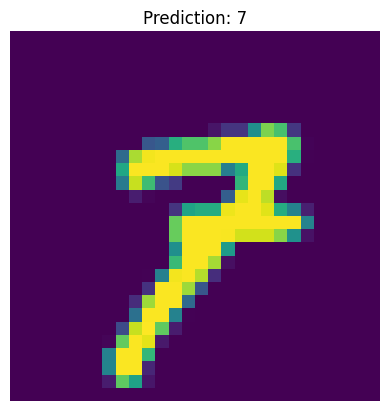

<Figure size 640x480 with 0 Axes>

In [96]:
# Choose a random index to display an image
import random
random_index = random.randint(0, len(images) - 1)

# Display the image and its corresponding prediction
img_array = images[random_index].mul(255).cpu().numpy().squeeze(0)
plt.imshow(img_array)
plt.axis('off')
plt.title(f"Prediction: {predictions[random_index]}")
plt.show()
plt.clf()

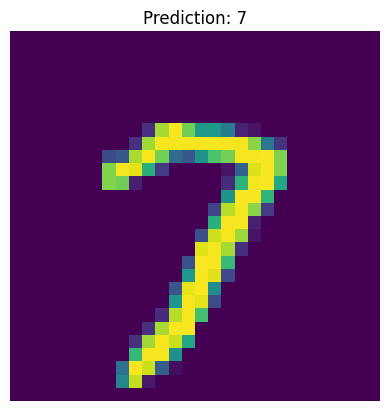

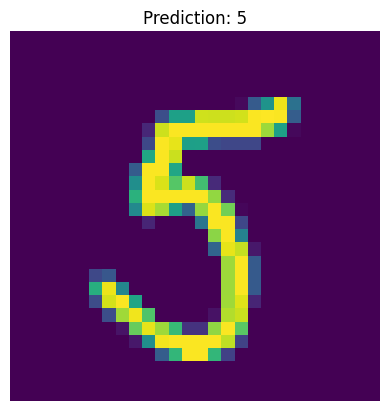

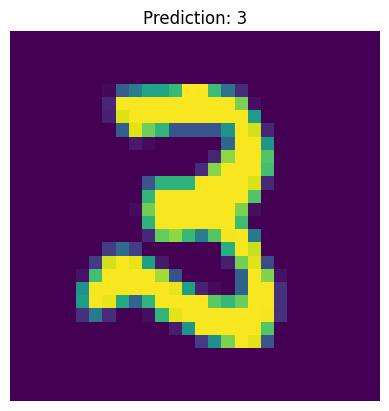

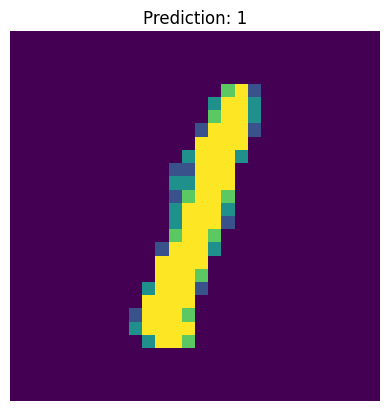

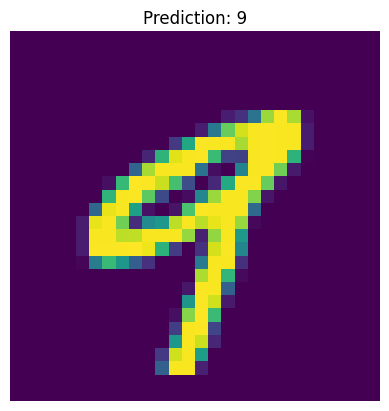

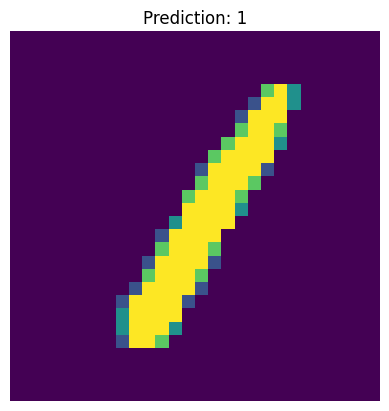

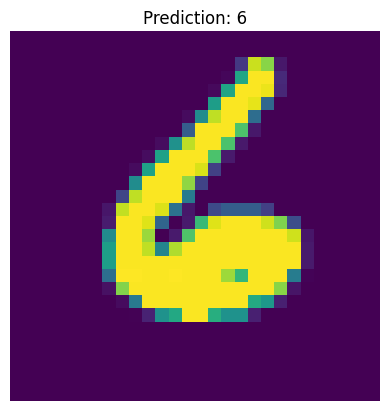

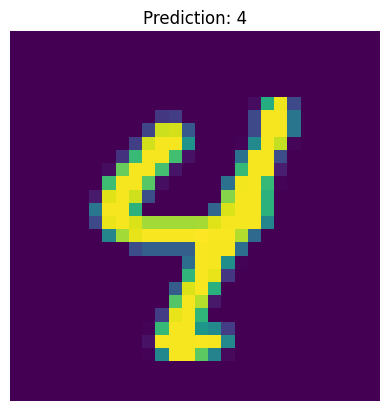

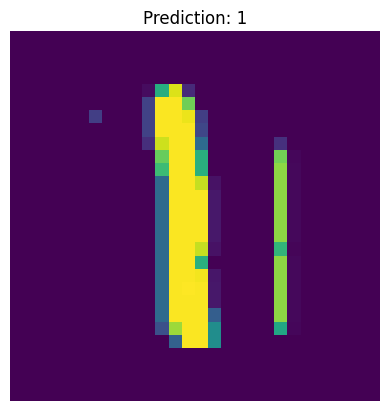

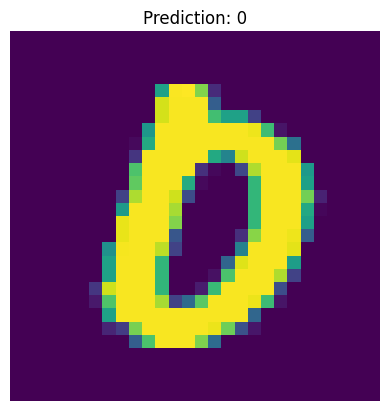

<Figure size 640x480 with 0 Axes>

In [97]:
import matplotlib.pyplot as plt

# Assuming images is a list of images and predictions is a list of corresponding predictions

data_iter = iter(test_loader)
images = next(data_iter)

# Get the indices of the last 10 images
last_10_indices = range(len(images) - 10, len(images))

# Loop through the last 10 indices
for i in last_10_indices:
    # Display the image and its corresponding prediction
    img_array = images[i].mul(255).cpu().numpy().squeeze(0)
    plt.imshow(img_array)
    plt.axis('off')
    plt.title(f"Prediction: {predictions[i]}")
    plt.show()
    plt.clf()  # Clear the plot for the next image

In [98]:
print(predictions)

[1, 2, 2, 5, 3, 5, 0, 6, 1, 4, 8, 0, 6, 9, 1, 8, 7, 7, 5, 4, 6, 7, 7, 5, 3, 1, 9, 1, 6, 4, 1, 0, 2, 3, 6, 0, 0, 2, 0, 0, 8, 0, 5, 4, 2, 9, 7, 8, 9, 0, 3, 0, 9, 8, 6, 2, 1, 1, 5, 1, 6, 9, 8, 5, 9, 4, 0, 1, 4, 4, 5, 5, 6, 3, 3, 3, 3, 6, 4, 2, 2, 9, 7, 2, 6, 3, 6, 9, 8, 6, 5, 0, 2, 0, 1, 9, 9, 5, 9, 8, 9, 2, 4, 9, 5, 9, 6, 2, 3, 2, 6, 3, 6, 6, 2, 5, 1, 4, 1, 5, 6, 4, 3, 5, 2, 1, 9, 4, 3, 7, 1, 2, 1, 2, 3, 3, 9, 9, 7, 7, 2, 6, 7, 3, 0, 6, 9, 8, 1, 0, 9, 8, 4, 4, 8, 7, 2, 6, 3, 7, 5, 0, 5, 3, 0, 5, 0, 2, 5, 3, 5, 1, 5, 4, 2, 2, 6, 2, 6, 0, 2, 7, 9, 5, 1, 2, 8, 4, 3, 5, 3, 4, 1, 5, 3, 2, 2, 2, 0, 4, 6, 1, 1, 5, 6, 3, 0, 8, 2, 5, 2, 5, 4, 7, 1, 6, 2, 9, 6, 0, 8, 8, 4, 1, 3, 9, 1, 7, 1, 7, 8, 6, 0, 4, 1, 6, 0, 3, 4, 5, 1, 2, 5, 9, 3, 2, 0, 9, 6, 8, 9, 3, 4, 2, 7, 5, 6, 6, 6, 1, 5, 6, 4, 4, 4, 8, 8, 1, 2, 0, 4, 6, 2, 4, 0, 6, 5, 9, 1, 9, 1, 1, 4, 0, 3, 0, 2, 5, 3, 6, 6, 5, 5, 6, 0, 6, 0, 4, 0, 5, 1, 1, 7, 6, 6, 7, 9, 9, 2, 5, 3, 6, 0, 9, 3, 4, 4, 8, 4, 7, 2, 2, 1, 1, 0, 4, 1, 2, 1, 6, 1, 9, 7, 

In [99]:
y_pred = np.array(predictions)

In [100]:
print(y_pred)

[1 2 2 ... 2 2 3]


In [101]:
y_pred.shape

(10000,)

In [103]:
import pandas as pd

final_inference = pd.DataFrame({
    'pred_cnn' : y_pred.reshape(10000,)
})

final_inference.to_csv('/content/drive/MyDrive/Arunachalam_Venkatachalam_preds.csv', index=False)